<h1><span style="color:black">Predicting Academic Failure: An XGBoost-Based Intelligent System Analysis</span></h1>

<h2><span style="color:black">Importing the necessary libraries</span></h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

<h2><span style="color:black">Scanning the dataset</span></h2>

In [2]:
data = pd.read_csv("/mnt/c/Users/sbboo/OneDrive/Desktop/Mini_project/student-data(1).csv")
odata = pd.read_csv("/mnt/c/Users/sbboo/OneDrive/Desktop/Mini_project/student-data(1).csv")

In [3]:
data.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities,nursery,higher,internet,famrel,freetime,goout,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,yes,yes,no,4,3,4,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,no,yes,yes,5,3,3,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,yes,yes,yes,4,3,2,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,yes,3,2,2,5,2,yes


<h2><span style="color:black">Data Preprocessing</span></h2>

<h3><span style="color:black">Label Encoding</span></h3>

In [4]:
def numerical_data():
    data['school'] = data['school'].map({'GP': 0, 'MS': 1})
    data['sex'] = data['sex'].map({'M': 0, 'F': 1})
    data['address'] = data['address'].map({'U': 0, 'R': 1})
    data['famsize'] = data['famsize'].map({'LE3': 0, 'GT3': 1})
    data['Pstatus'] = data['Pstatus'].map({'T': 0, 'A': 1})
    data['Mjob'] = data['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    data['Fjob'] = data['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    data['reason'] = data['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    data['guardian'] = data['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    data['schoolsup'] = data['schoolsup'].map({'no': 0, 'yes': 1})
    data['famsup'] = data['famsup'].map({'no': 0, 'yes': 1})
    data['paid'] = data['paid'].map({'no': 0, 'yes': 1})
    data['activities'] = data['activities'].map({'no': 0, 'yes': 1})
    data['nursery'] = data['nursery'].map({'no': 0, 'yes': 1})
    data['higher'] = data['higher'].map({'no': 0, 'yes': 1})
    data['internet'] = data['internet'].map({'no': 0, 'yes': 1})
    data['passed'] = data['passed'].map({'no': 0, 'yes': 1})
    col = data['passed']
    del data['passed']
    data['passed'] = col

<h3><span style="color:black">Feature Scaling</span></h3>

In [5]:
def feature_scaling(data):
    for i in data:
        col = data[i]
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            data[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            data[i] = col

In [6]:
numerical_data()
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities,nursery,higher,internet,famrel,freetime,goout,health,absences,passed
0,0,1,18,0,1,1,4,4,3,0,...,0,1,1,0,4,3,4,3,6,0
1,0,1,17,0,1,0,1,1,3,4,...,0,0,1,1,5,3,3,3,4,0
2,0,1,15,0,0,0,1,1,3,4,...,0,1,1,1,4,3,2,3,10,1
3,0,1,15,0,1,0,4,2,1,2,...,1,1,1,1,3,2,2,5,2,1
4,0,1,16,0,1,0,3,3,4,4,...,0,1,1,0,4,3,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,0,0,1,2,2,2,2,...,0,1,1,0,5,5,4,4,11,0
391,1,0,17,0,0,0,3,1,2,2,...,0,0,1,1,2,4,5,2,3,1
392,1,0,21,1,1,0,1,1,4,4,...,0,0,1,0,5,5,3,3,3,0
393,1,0,18,1,0,0,3,2,2,4,...,0,0,1,1,4,4,1,5,0,1


In [7]:
feature_scaling(data)

In [8]:
a=data
a

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities,nursery,higher,internet,famrel,freetime,goout,health,absences,passed
0,0.0,1.0,0.059264,0.0,1.0,1.0,1.00,1.00,0.75,0.00,...,0.0,1.0,1.0,0.0,0.75,0.50,0.75,0.50,0.003882,0.0
1,0.0,1.0,0.013809,0.0,1.0,0.0,0.25,0.25,0.75,1.00,...,0.0,0.0,1.0,1.0,1.00,0.50,0.50,0.50,-0.022785,0.0
2,0.0,1.0,-0.077100,0.0,0.0,0.0,0.25,0.25,0.75,1.00,...,0.0,1.0,1.0,1.0,0.75,0.50,0.25,0.50,0.057215,1.0
3,0.0,1.0,-0.077100,0.0,1.0,0.0,1.00,0.50,0.25,0.50,...,1.0,1.0,1.0,1.0,0.50,0.25,0.25,1.00,-0.049451,1.0
4,0.0,1.0,-0.031646,0.0,1.0,0.0,0.75,0.75,1.00,1.00,...,0.0,1.0,1.0,0.0,0.75,0.50,0.25,1.00,-0.022785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,0.0,0.150173,0.0,0.0,1.0,0.50,0.50,0.50,0.50,...,0.0,1.0,1.0,0.0,1.00,1.00,0.75,0.75,0.070549,0.0
391,1.0,0.0,0.013809,0.0,0.0,0.0,0.75,0.25,0.50,0.50,...,0.0,0.0,1.0,1.0,0.25,0.75,1.00,0.25,-0.036118,1.0
392,1.0,0.0,0.195627,1.0,1.0,0.0,0.25,0.25,1.00,1.00,...,0.0,0.0,1.0,0.0,1.00,1.00,0.50,0.50,-0.036118,0.0
393,1.0,0.0,0.059264,1.0,0.0,0.0,0.75,0.50,0.50,1.00,...,0.0,0.0,1.0,1.0,0.75,0.75,0.00,1.00,-0.076118,1.0


<h2><span style="color:black">Assigning "X-variables" and "Y-variables"</span></h2>

In [9]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'passed'],
      dtype='object')

In [10]:
x=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'Walc', 'health', 'absences']

In [11]:
y=['passed']

<h2><span style="color:black">Graphs</span></h2>

<h3><span style="color:black">Number Students of Passed vs Failed</span></h3>

In [12]:
odata['passed'].value_counts()

passed
yes    265
no     130
Name: count, dtype: int64

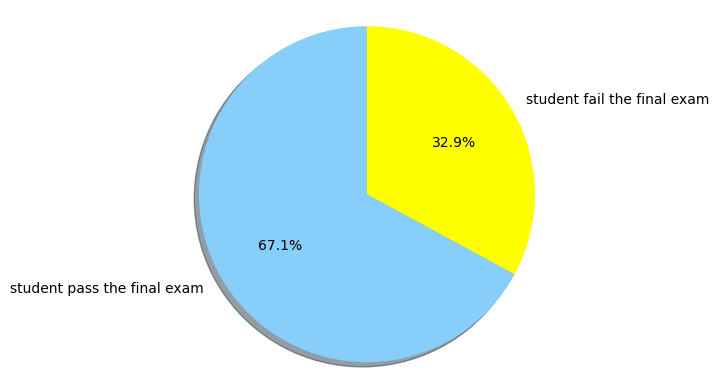

In [13]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<h3><span style="color:black">Correlation Heatmap for the labels</span></h3>

<Axes: >

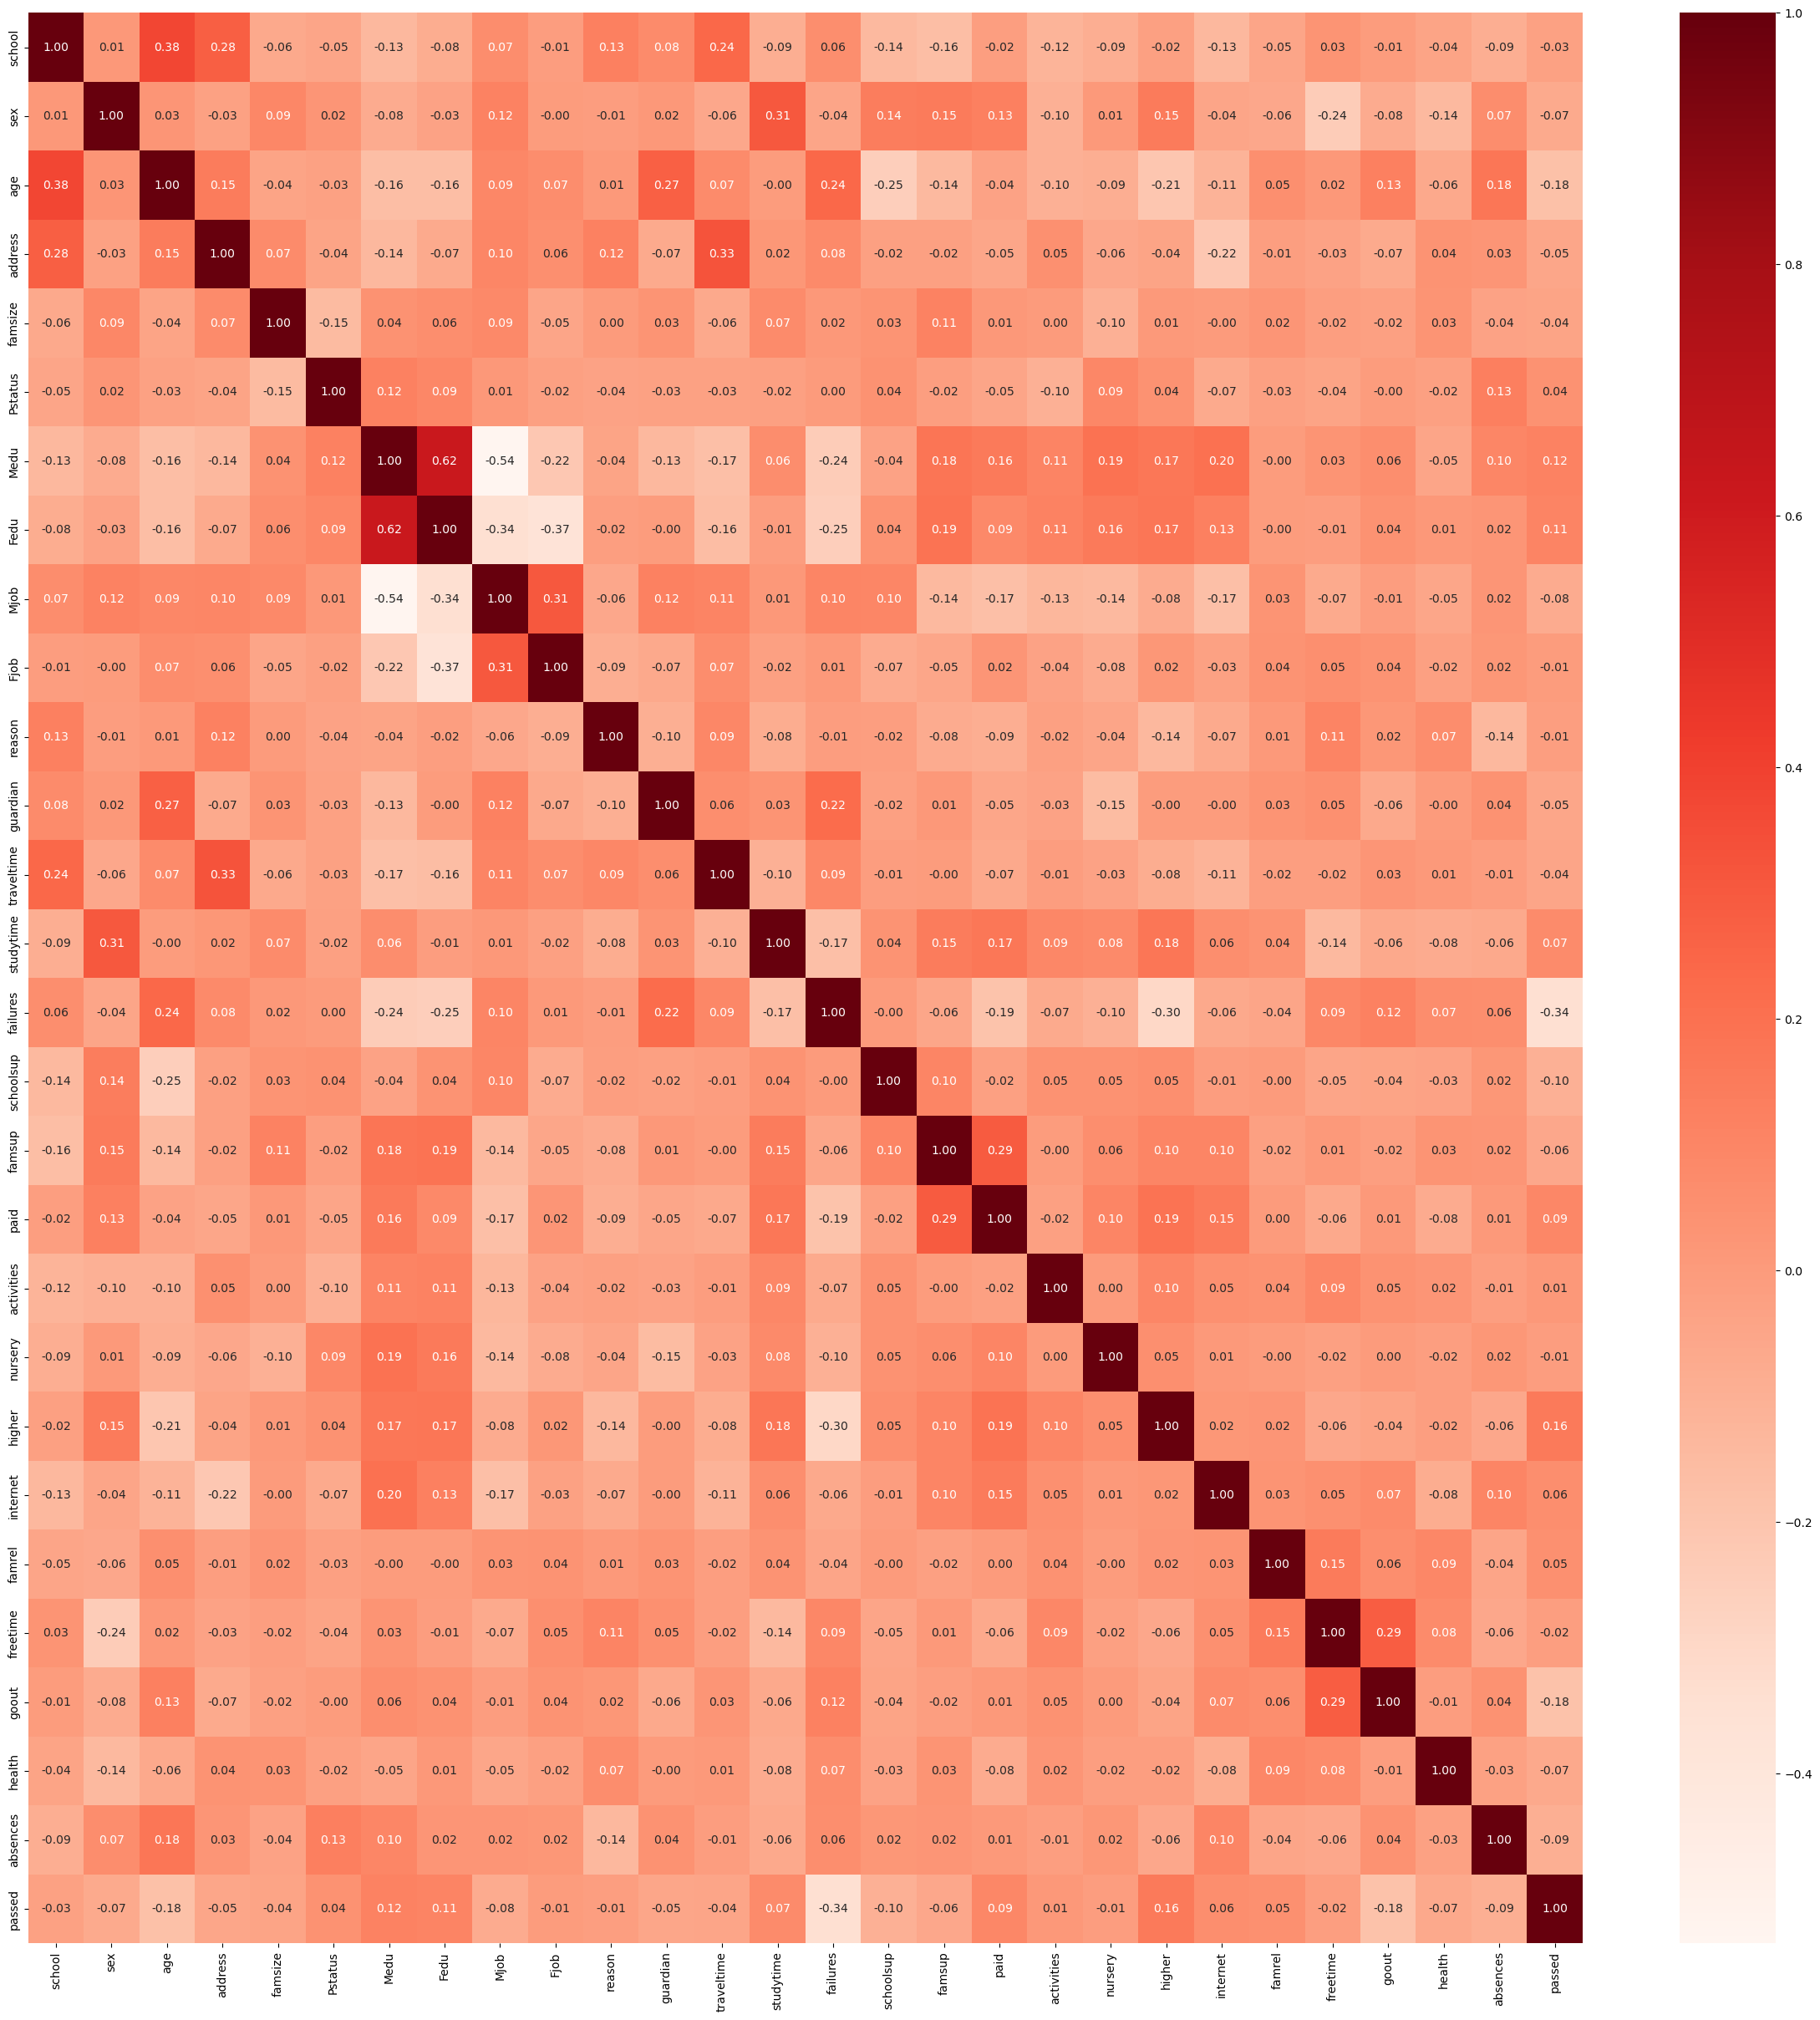

In [14]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, fmt='.2f', cmap="Reds")

<h3><span style="color:black">Features Correlation for the labels</span></h3>

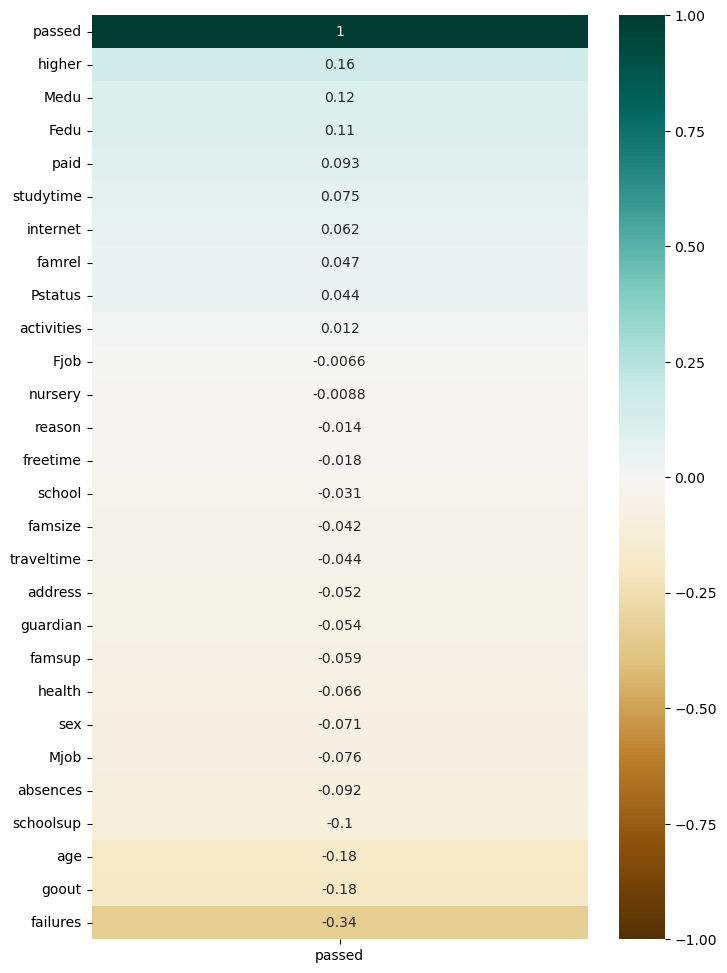

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<h3><span style="color:black">Student status by Frequency of Going Out</span></h3>

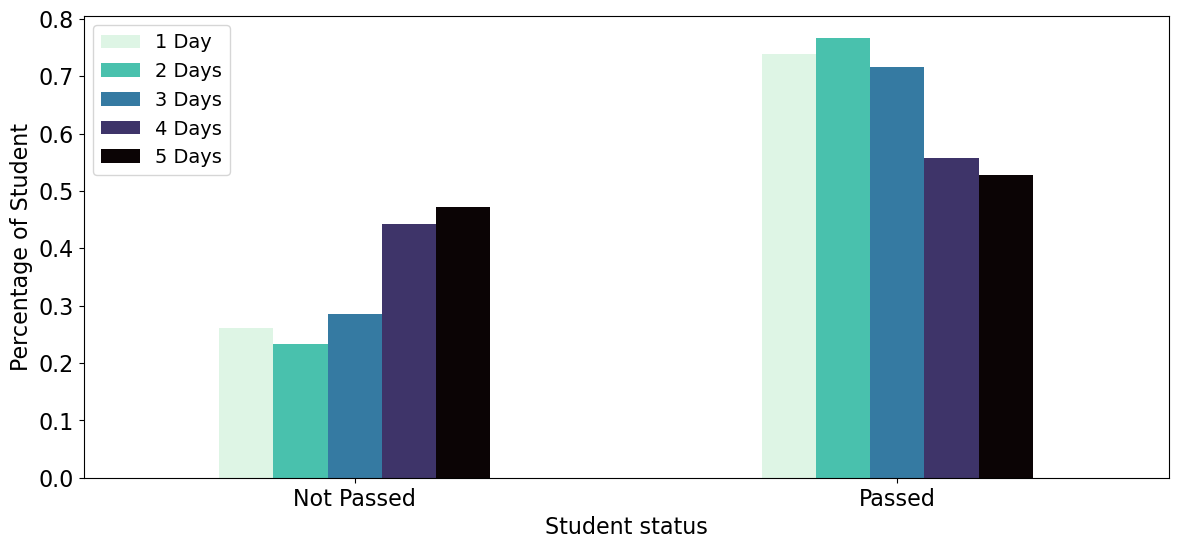

In [16]:
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=data.passed, columns=data.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_plot = out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['1 Day', '2 Days', '3 Days', '4 Days', '5 Days']
out_plot.legend(legend_labels, fontsize=14)

<h3><span style="color:black">Father's Occupation</span></h3>

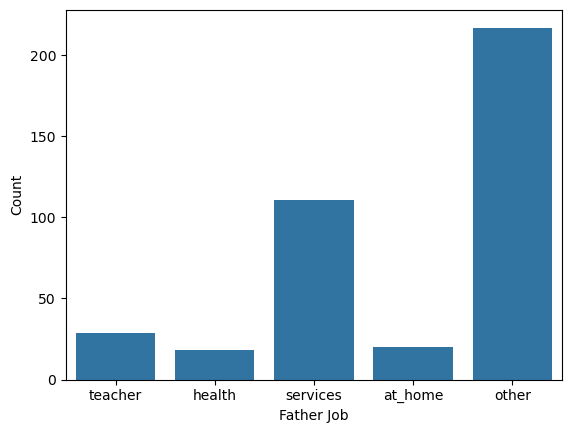

In [17]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=odata, order=['teacher','health','services','at_home','other'])
fx = fx.set(ylabel="Count", xlabel="Father Job")
figure.grid(False)

<h3><span style="color:black">Student status by Father's Job</span></h3>

<Figure size 640x480 with 0 Axes>

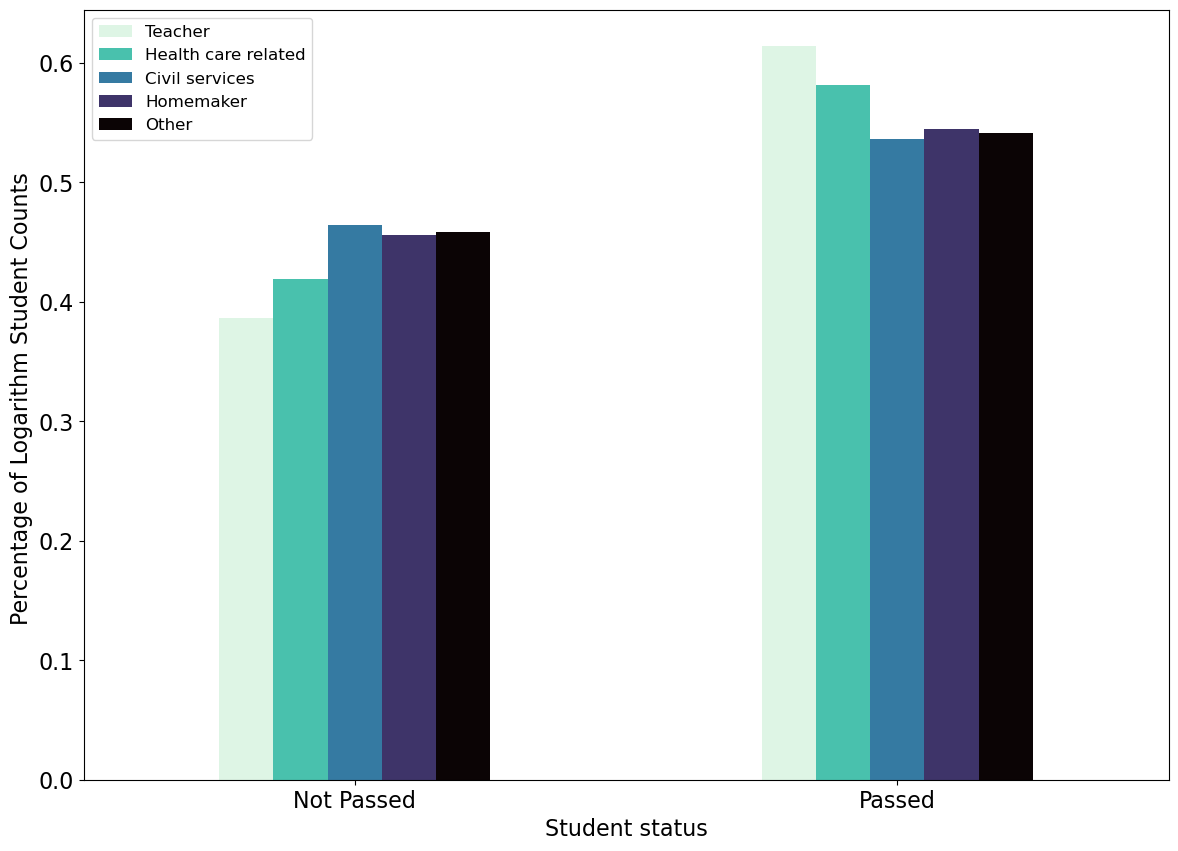

In [18]:
mjob_tab1 = pd.crosstab(index=data.passed, columns=data.Fjob)
mjob_tab = np.log(mjob_tab1)
mjob_perc = mjob_tab.apply(perc).reindex(index)
plt.figure()
mjob_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,10))
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['Teacher', 'Health care related', 'Civil services', 'Homemaker', 'Other']
plt.legend(legend_labels, fontsize=12)
plt.show()

<h3><span style="color:black">Father's Education Level</span></h3>

/tmp/ipykernel_1104/3884527974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_father_education'] = good.Fedu
/tmp/ipykernel_1104/3884527974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_father_education'] = poor.Fedu
/tmp/ipykernel_1104/3884527974.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p=sns.kdeplot(good['good_student_father_education']

Text(0.5, 0, "Father's Education Level")

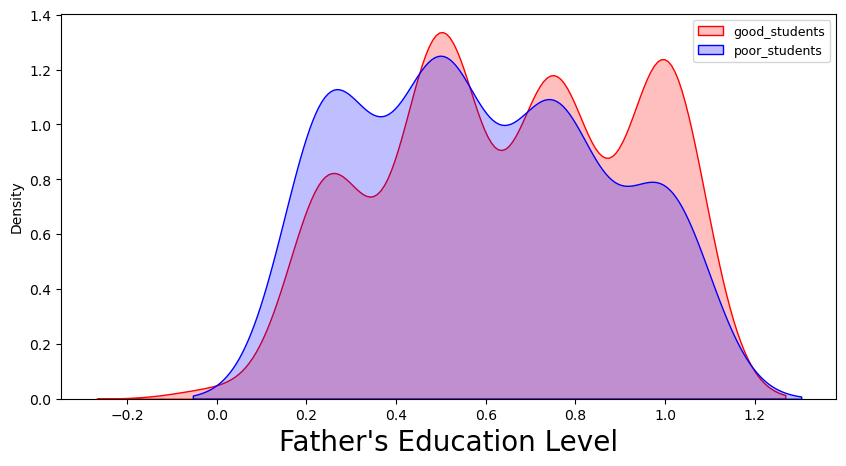

In [19]:
good = data.loc[data.passed==1]
poor=data.loc[data.passed==0]
good['good_student_father_education'] = good.Fedu
poor['poor_student_father_education'] = poor.Fedu
plt.figure(figsize=(10,5))
p=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")#poor_student in blue
legend_labels = ['good_students','poor_students']
plt.legend(legend_labels, fontsize=9)
plt.xlabel("Father's Education Level", fontsize=20)

<h3><span style="color:black">Mother's Occupation</span></h3>

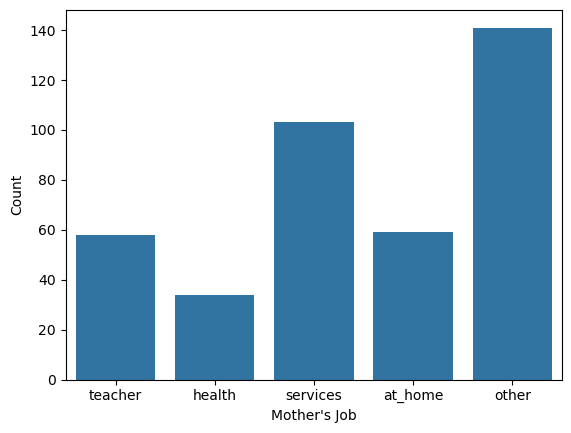

In [20]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=odata, order=['teacher','health','services','at_home','other'])
fx = fx.set(ylabel="Count", xlabel="Mother's Job")
figure.grid(False)

<h3><span style="color:black">Student status by Mother's Job</span></h3>

<Figure size 640x480 with 0 Axes>

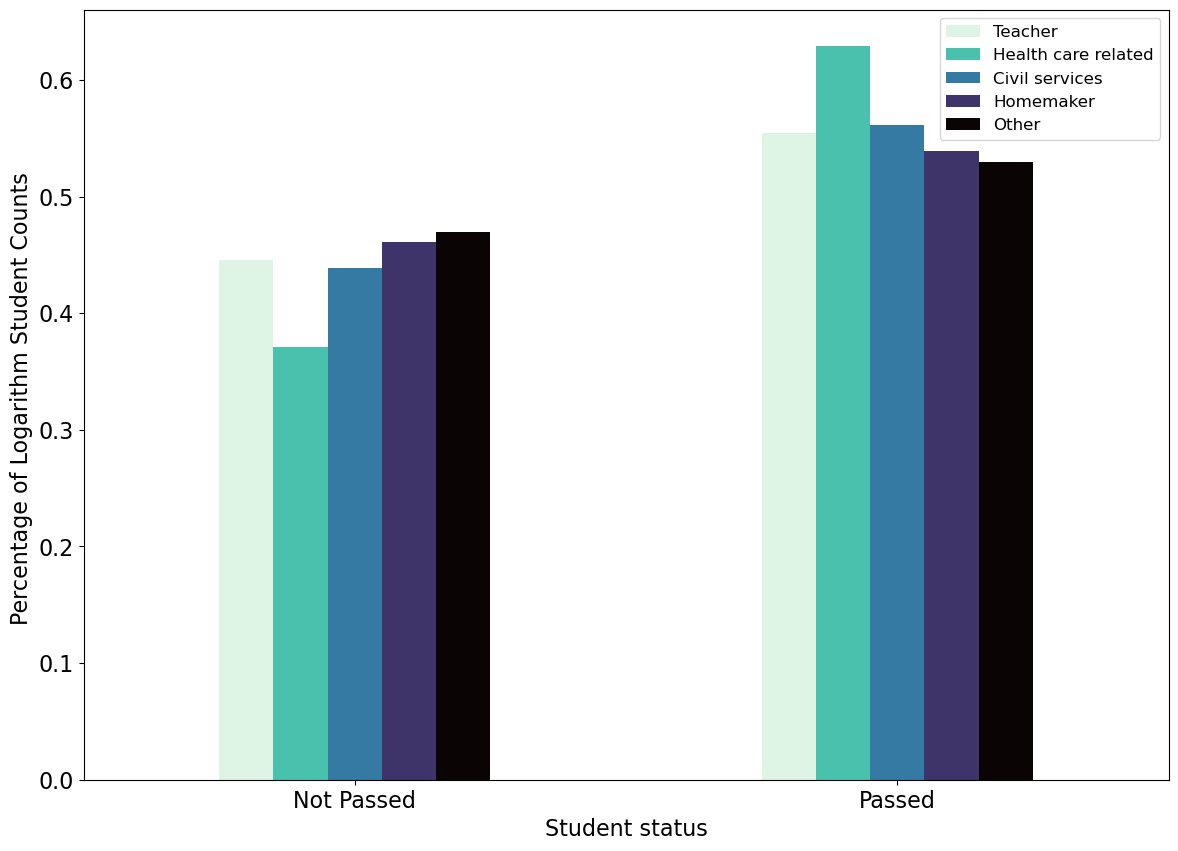

In [21]:
mjob_tab1 = pd.crosstab(index=data.passed, columns=data.Mjob)
mjob_tab = np.log(mjob_tab1)
mjob_perc = mjob_tab.apply(perc).reindex(index)
plt.figure()
mjob_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,10))
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['Teacher', 'Health care related', 'Civil services', 'Homemaker', 'Other']
plt.legend(legend_labels, fontsize=12)
plt.show()

<h3><span style="color:black">Mother's Education Level</span></h3>

/tmp/ipykernel_1104/2869403992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_mother_education'] = good.Medu
/tmp/ipykernel_1104/2869403992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_mother_education'] = poor.Medu
/tmp/ipykernel_1104/2869403992.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p=sns.kdeplot(good['good_student_mother_education']

Text(0.5, 0, 'Mother Education Level')

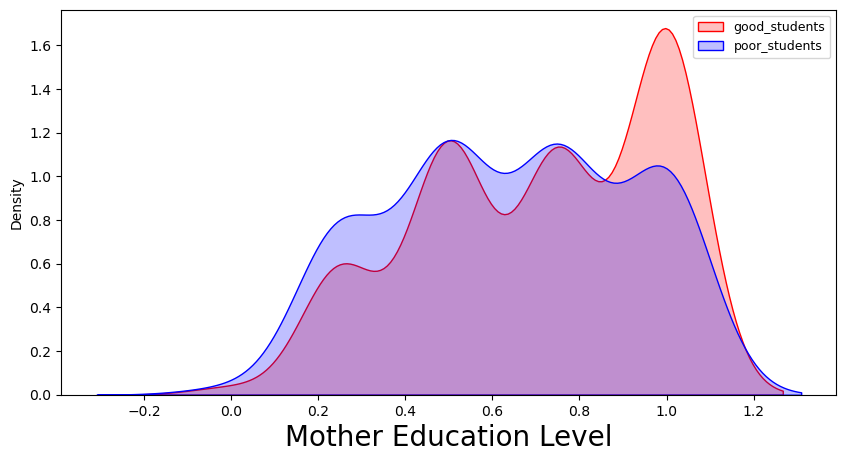

In [22]:
good = data.loc[data.passed==1]
poor=data.loc[data.passed==0]
good['good_student_mother_education'] = good.Medu
poor['poor_student_mother_education'] = poor.Medu
plt.figure(figsize=(10,5))
p=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")#poor_student in blue
legend_labels = ['good_students','poor_students']
plt.legend(legend_labels, fontsize=9)
plt.xlabel('Mother Education Level', fontsize=20)

<h3><span style="color:black">Final Grade By Desire to Receive Higher Education</span></h3>

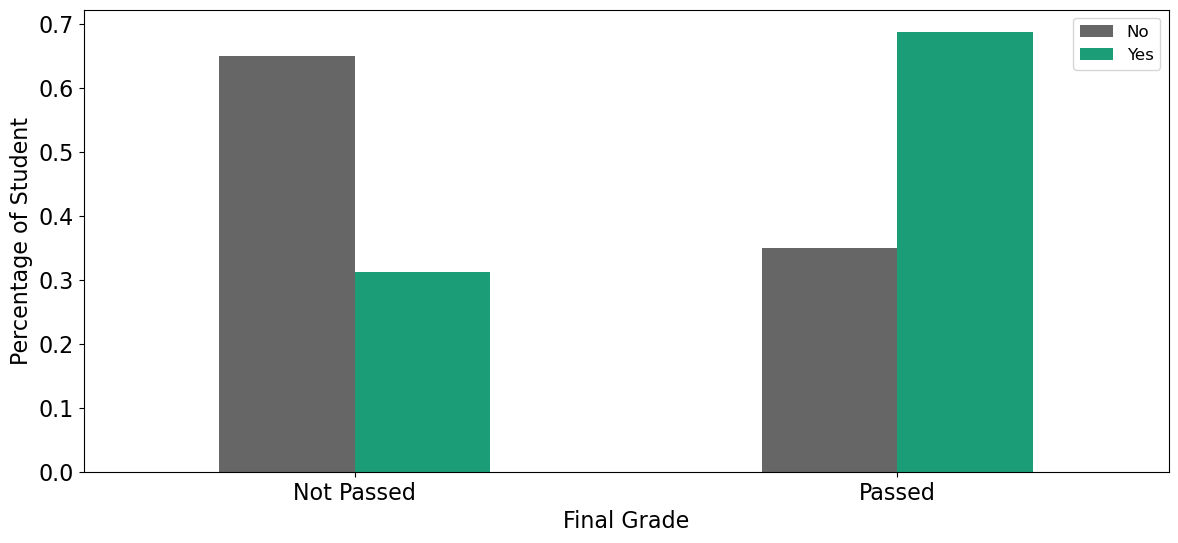

In [23]:
higher_tab = pd.crosstab(index=data.passed, columns=data.higher)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['No', 'Yes']
plt.legend(legend_labels, fontsize=12)

<h3><span style="color:black">Student Status by Age</span></h3>

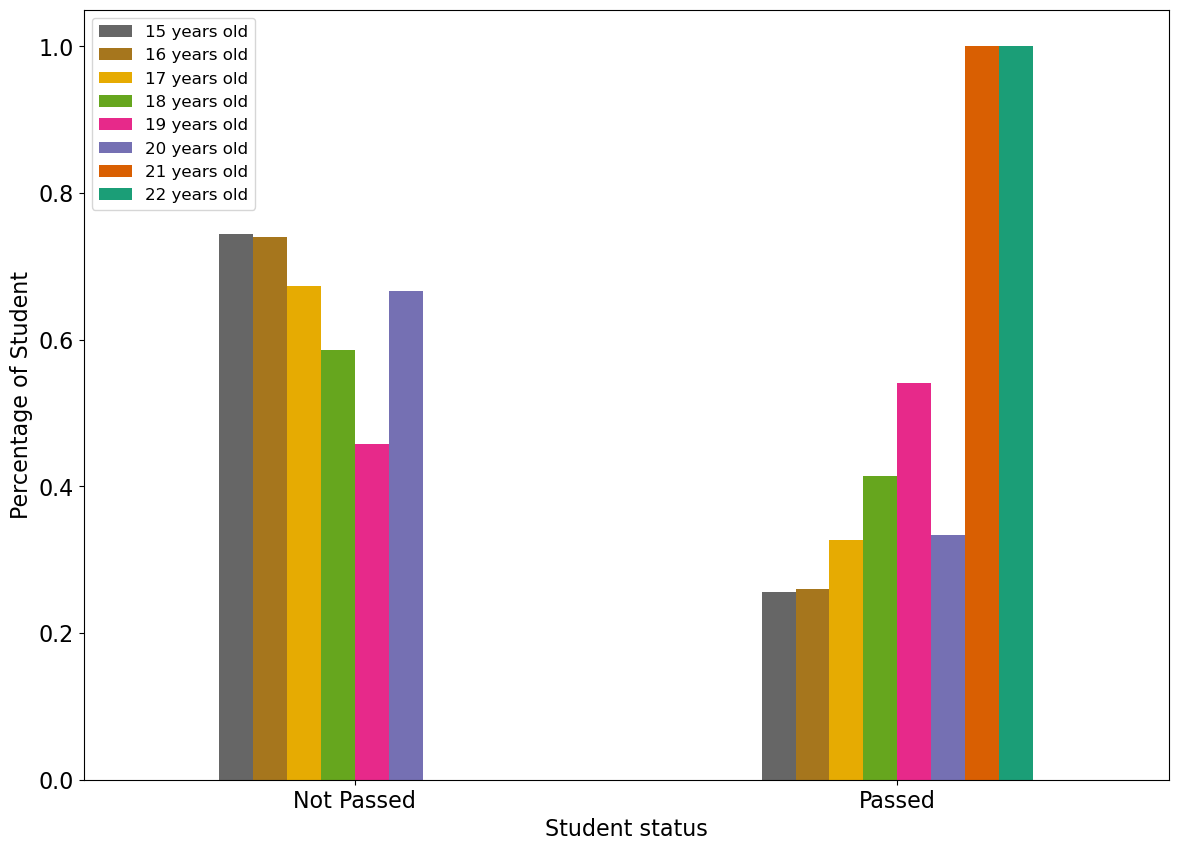

In [24]:
higher_tab = pd.crosstab(index=data.passed, columns=data.age)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc_sorted = higher_perc.sort_index(ascending=False)
higher_perc_sorted.plot.bar(colormap="Dark2_r", figsize=(14,10), fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['15 years old', '16 years old', '17 years old', '18 years old', '19 years old', '20 years old', '21 years old', '22 years old']
plt.legend(legend_labels, fontsize=12)

<h3><span style="color:black">Student status by failures</span></h3>

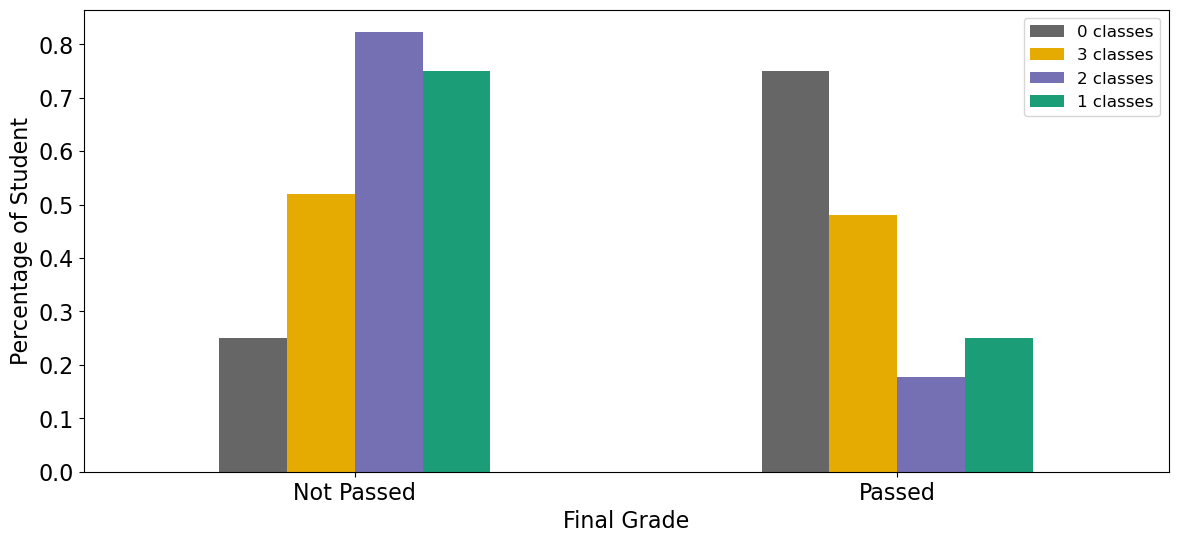

In [25]:
fail_tab = pd.crosstab(index=data.passed, columns=data.failures)
fail_perc = fail_tab.apply(perc).reindex(index)
fail_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['0 classes', '3 classes', '2 classes', '1 classes']
plt.legend(legend_labels, fontsize=12)

<h3><span style="color:black">Address Distribution</span></h3>

([<matplotlib.axis.XTick at 0x7f9b30120be0>,
 [Text(0, 0, 'Urban'), Text(1, 0, 'Rural')])

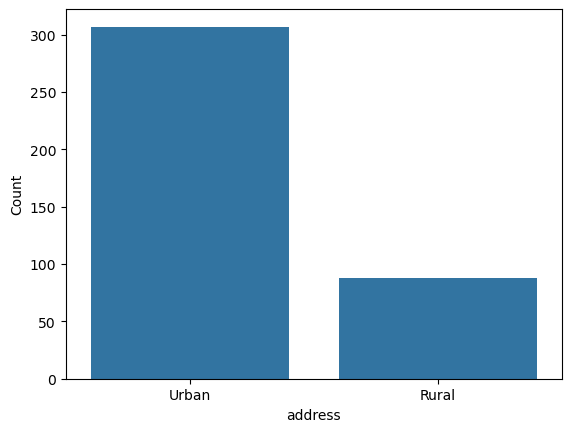

In [26]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'address', data=odata, order=['U','R'])
fx = fx.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.xticks(ticks=[0, 1], labels=['Urban', 'Rural'], rotation=0)

<h3><span style="color:black">Student status by Living Area</span></h3>

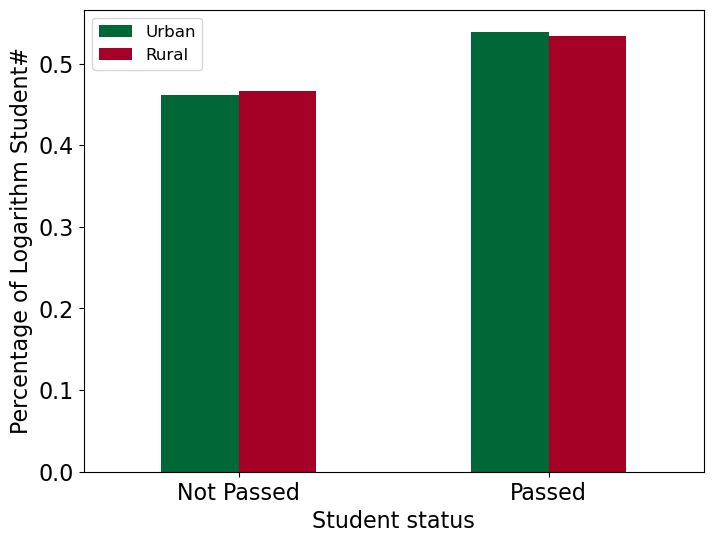

In [27]:
ad_tab1 = pd.crosstab(index=data.passed, columns=data.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['Urban', 'Rural']
plt.legend(legend_labels, fontsize=12)

<h3><span style="color:black">Student status by internet accessibility</span></h3>

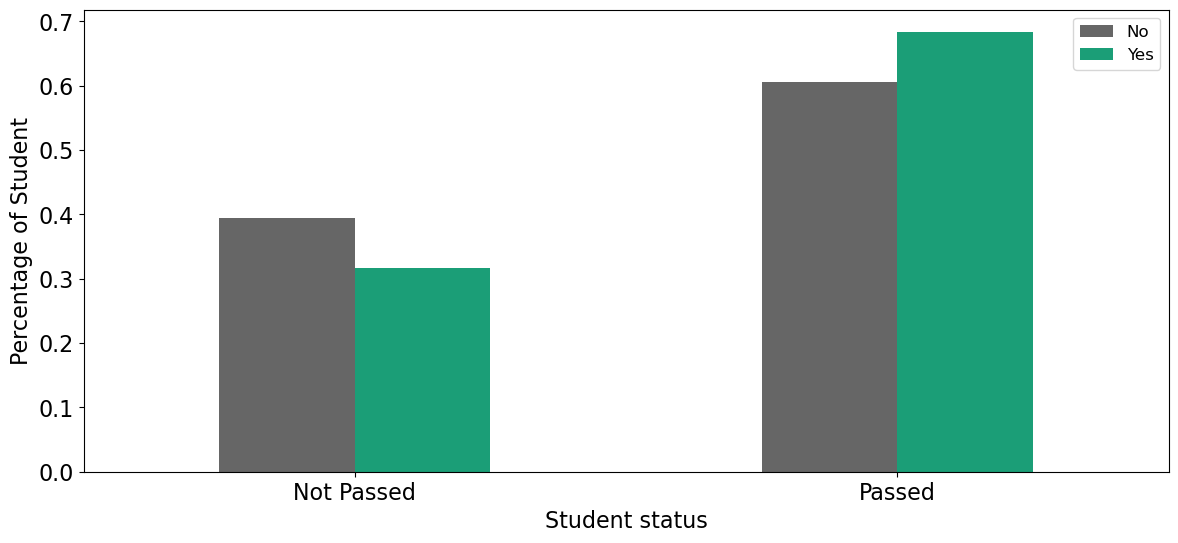

In [28]:
alc_tab = pd.crosstab(index=data.passed, columns=data.internet)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['No', 'Yes']
plt.legend(legend_labels, fontsize=12)

<h3><span style="color:black">Student status by study time</span></h3>

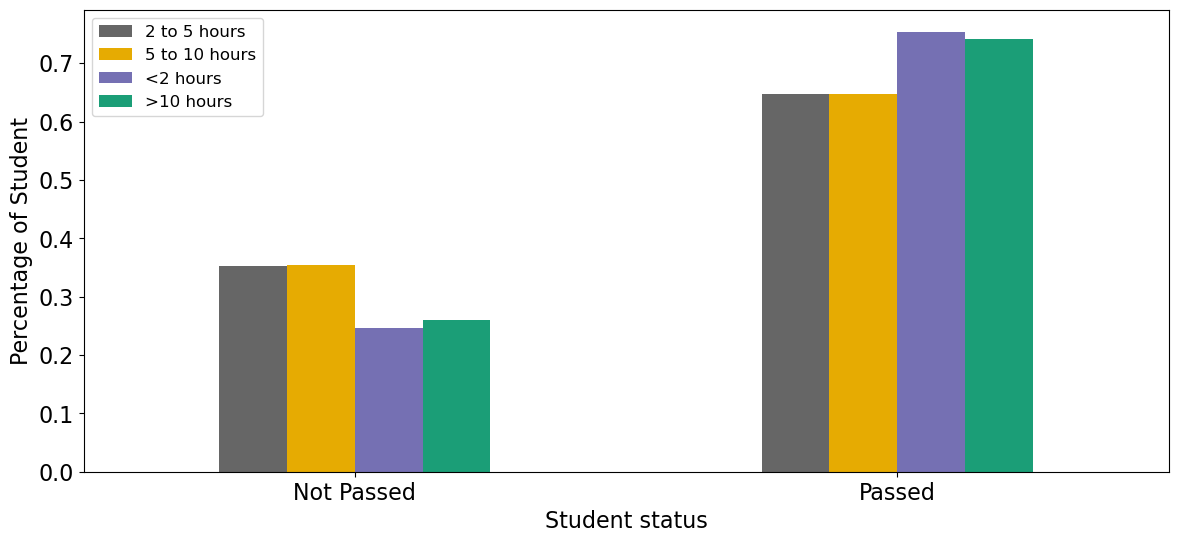

In [29]:
stu_tab = pd.crosstab(index=data.passed, columns=data.studytime)
stu_perc = stu_tab.apply(perc).reindex(index)
stu_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['2 to 5 hours', '5 to 10 hours', '<2 hours', '>10 hours']
plt.legend(legend_labels, fontsize=12)

<h3><span style="color:black">Student status by health</span></h3>

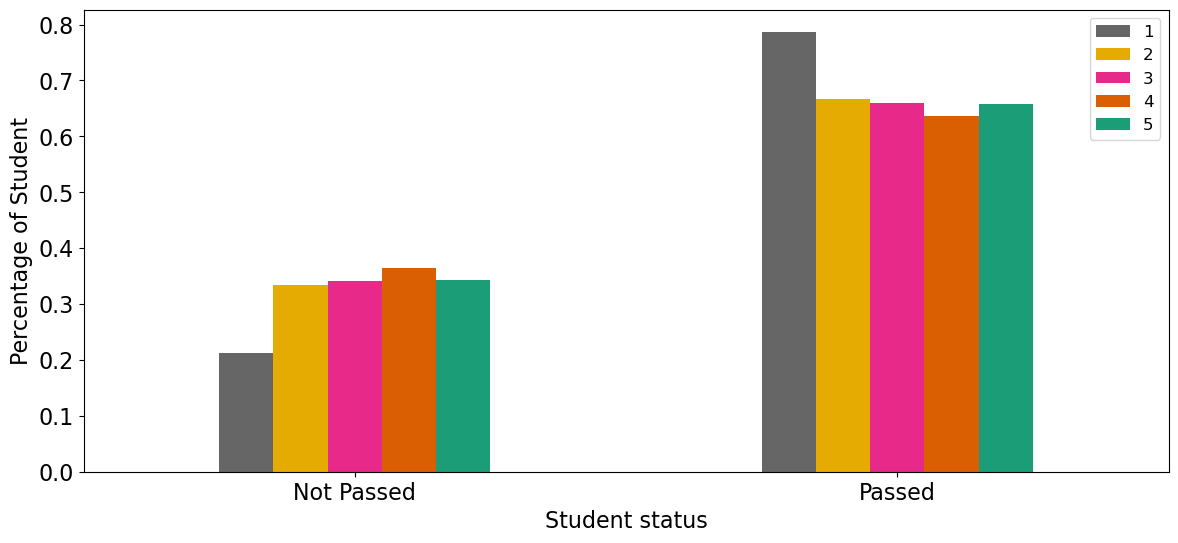

In [30]:
he_tab = pd.crosstab(index=data.passed, columns=data.health)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Not Passed', 'Passed'], rotation=0)
legend_labels = ['1', '2', '3', '4', '5']
plt.legend(legend_labels, fontsize=12)

<h2><span style="color:black">Splitting Dataset into Train_set(70%) and Test_set(30%)</span></h2>

In [31]:
data = data.to_numpy()
n = data.shape[1]
x = data[:,0:n-1]
y = data[:,n-1]
b=data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

<h2><span style="color:black">Original Accuracy of the models</span></h2>

<h3><span style="color:black">Decision Tree</span></h3>

In [32]:
decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(x_train, y_train)

y_pred_dt = decision_tree_model.predict(x_test)

In [33]:
y_pred_dt

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.])

In [34]:
dttest = accuracy_score(y_test,y_pred_dt)
dtf1 = f1_score(y_test, y_pred_dt, average='macro')

In [35]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.63      0.44      0.52        50
         1.0       0.67      0.81      0.73        69

    accuracy                           0.66       119
   macro avg       0.65      0.63      0.62       119
weighted avg       0.65      0.66      0.64       119



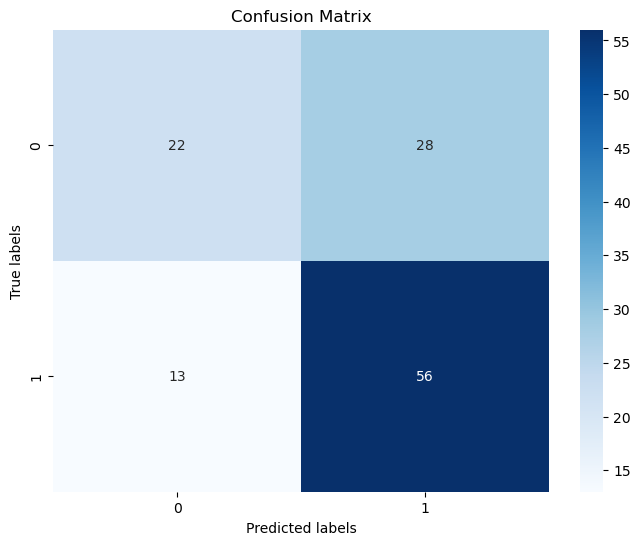

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


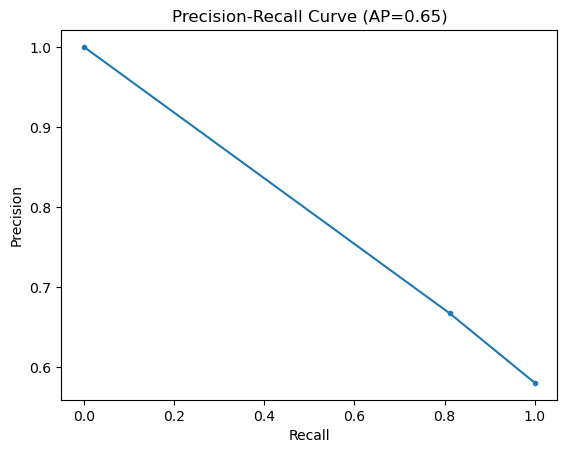

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_dt)

# Compute average precision
average_precision = average_precision_score(y_test, y_pred_dt)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


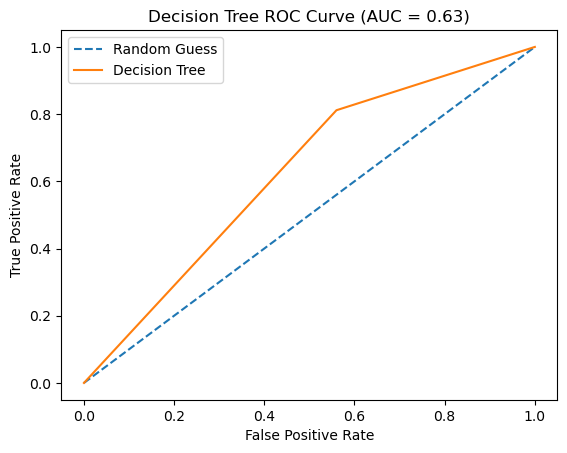

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_dt)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_dt)

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.plot(fpositif, tpositif, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.legend()
plt.show()


<h3><span style="color:black">k-Nearest Neighbors</span></h3>

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

In [40]:
y_pred_knn

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [41]:
knntest = accuracy_score(y_test,y_pred_knn)
knnf1 = f1_score(y_test, y_pred_dt, average='macro')

In [42]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.44      0.08      0.14        50
         1.0       0.58      0.93      0.72        69

    accuracy                           0.57       119
   macro avg       0.51      0.50      0.43       119
weighted avg       0.52      0.57      0.47       119



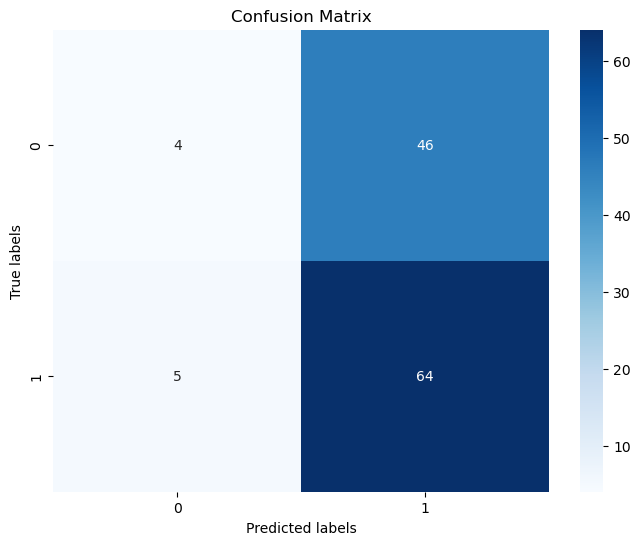

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


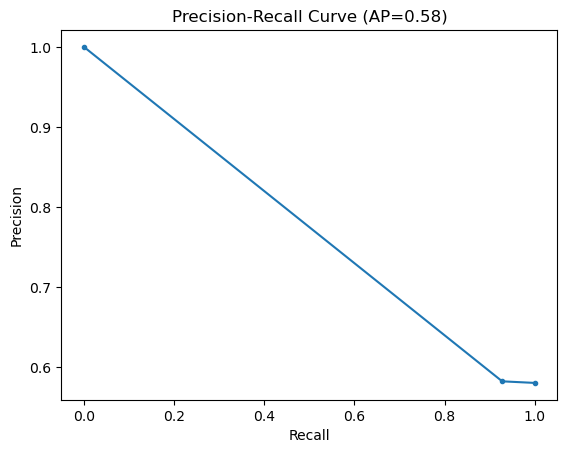

In [44]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_knn)

# Compute average precision
average_precision = average_precision_score(y_test, y_pred_knn)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


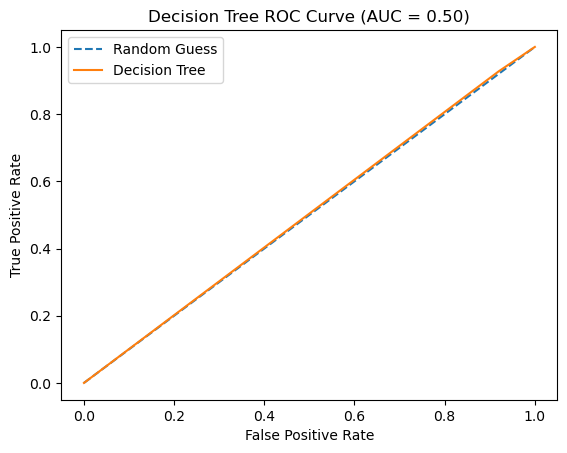

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_knn)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_knn)

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.plot(fpositif, tpositif, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.legend()
plt.show()


<h3><span style="color:black">Naive Bayes</span></h3>

In [46]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)
accuracy_test_nb = accuracy_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb, average='macro')


In [47]:
y_pred_nb

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.67      0.28      0.39        50
         1.0       0.63      0.90      0.74        69

    accuracy                           0.64       119
   macro avg       0.65      0.59      0.57       119
weighted avg       0.65      0.64      0.60       119



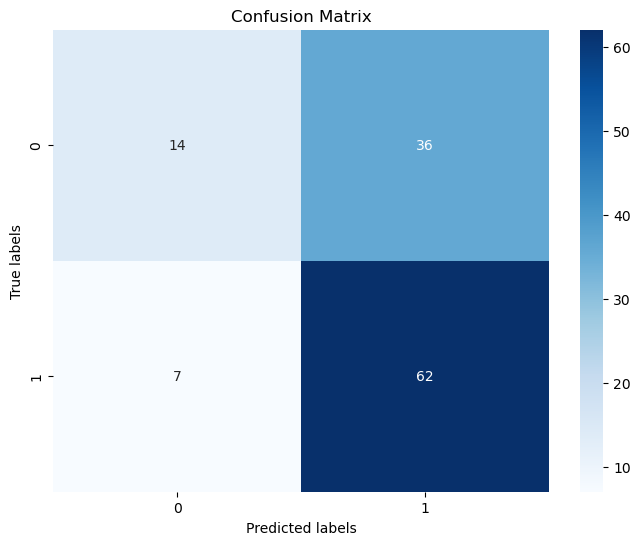

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


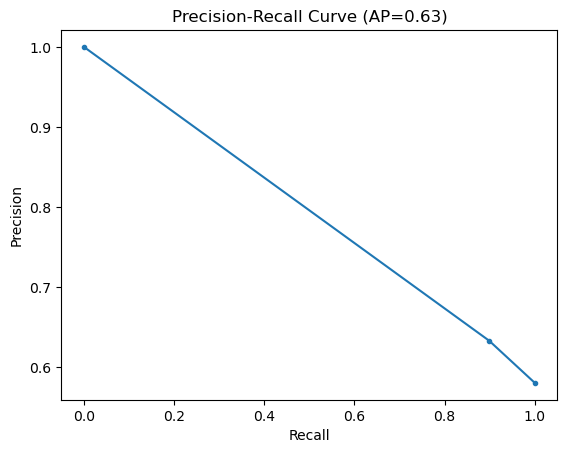

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_nb)

# Compute average precision
average_precision = average_precision_score(y_test, y_pred_nb)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


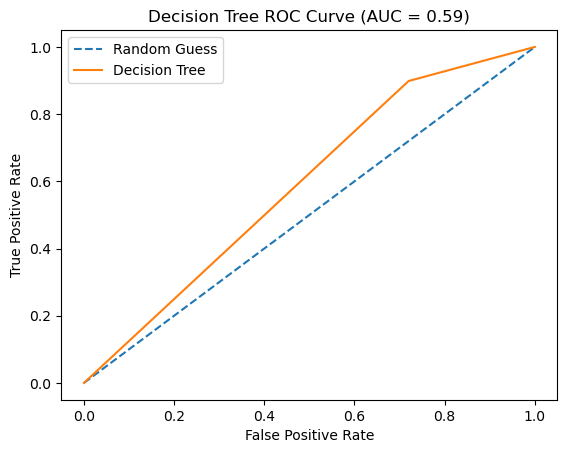

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_nb)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_nb)

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.plot(fpositif, tpositif, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.legend()
plt.show()


<h3><span style="color:black">Gradient Boosting Machine</span></h3>

In [52]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
gb_model.fit(x_train, y_train)

y_pred_gb = gb_model.predict(x_test)

In [53]:
y_pred_gb

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [54]:
gbtest = accuracy_score(y_test,y_pred_gb)
gbf1 = f1_score(y_test, y_pred_gb, average='macro')

In [55]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.73      0.38      0.50        50
         1.0       0.67      0.90      0.77        69

    accuracy                           0.68       119
   macro avg       0.70      0.64      0.63       119
weighted avg       0.69      0.68      0.65       119



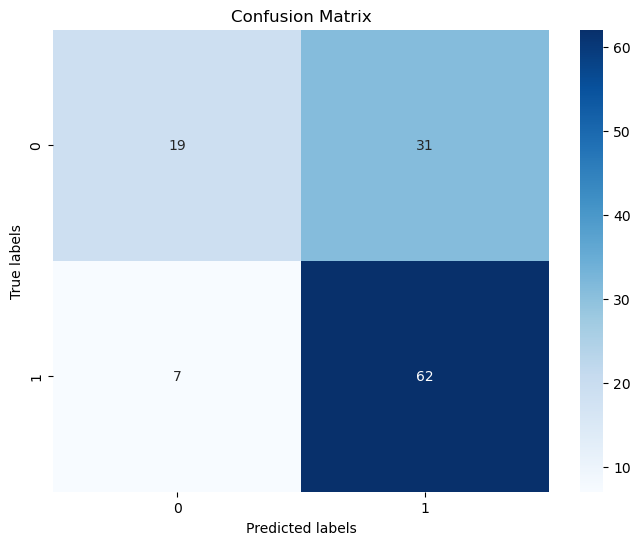

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


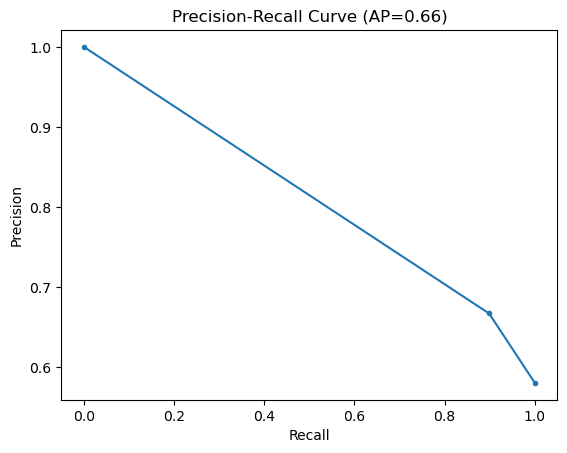

In [57]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb)

# Compute average precision
average_precision = average_precision_score(y_test, y_pred_gb)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


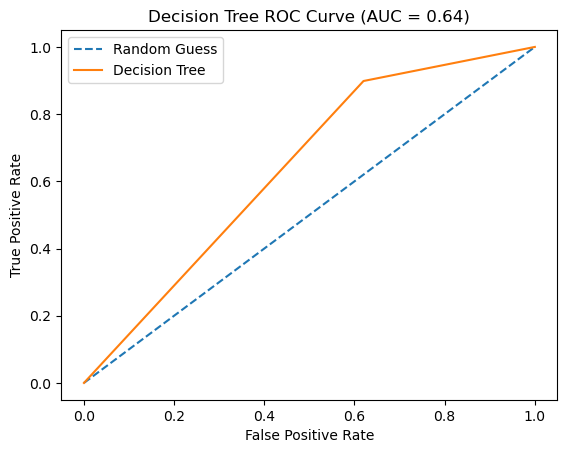

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_gb)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_gb)

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.plot(fpositif, tpositif, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.legend()
plt.show()


<h3><span style="color:black">eXtreme Gradient Boosting (XGBoost)</span></h3>

In [59]:
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.5)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred_xgb = xgb_model.predict(x_test)
accuracy_test_xgb = accuracy_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb, average='macro')

In [61]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.72      0.36      0.48        50
         1.0       0.66      0.90      0.76        69

    accuracy                           0.67       119
   macro avg       0.69      0.63      0.62       119
weighted avg       0.68      0.67      0.64       119



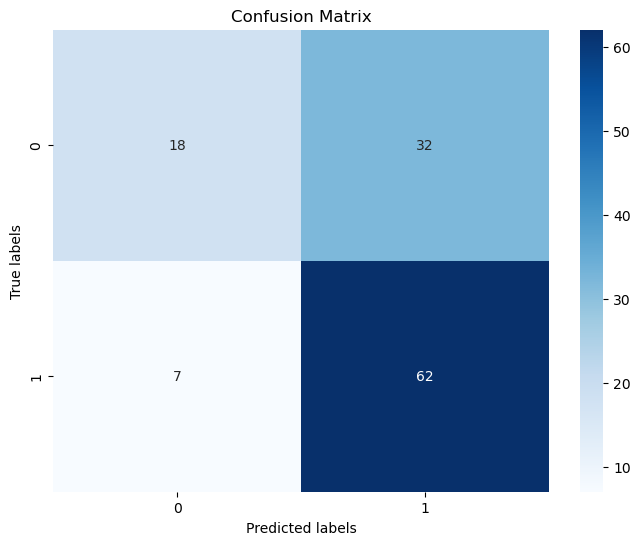

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


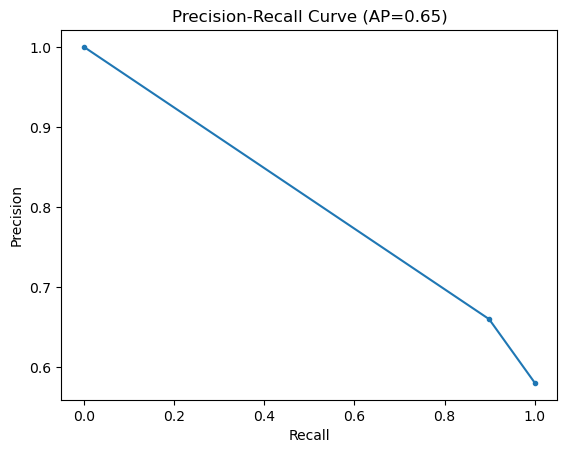

In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)

# Compute average precision
average_precision = average_precision_score(y_test, y_pred_xgb)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


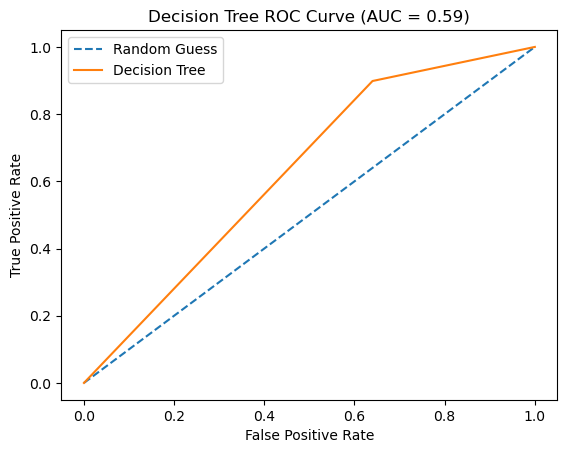

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_xgb)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_nb)

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.plot(fpositif, tpositif, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.legend()
plt.show()


<h2><span style="color:black"> Multiple Criteria Decision Making (MCMD) feature extractor</span></h2>

<h3><span style="color:black">Unweighted - Technique for Order of Preference by Similarity to Ideal Solution (uw-TOPSIS)</span></h3>

In [65]:
data=a

In [66]:
criteria = ["studytime", "goout", "absences"]
decision_matrix = data[criteria]
decision_matrix = decision_matrix.fillna(decision_matrix.mean())

def normalize_matrix(matrix):
    norm_matrix = matrix.copy()
    for i in range(len(matrix.columns)):
        norm_matrix.iloc[:, i] = (matrix.iloc[:, i] - matrix.min(axis=0)[i]) / (matrix.max(axis=0)[i] - matrix.min(axis=0)[i])
    return norm_matrix

normalized_matrix = normalize_matrix(decision_matrix.copy())

def ideal_solutions(matrix):
    ideal_positive = matrix.max(axis=0)
    ideal_negative = matrix.min(axis=0)
    return ideal_positive, ideal_negative

ideal_pos, ideal_neg = ideal_solutions(normalized_matrix.copy())

def distances_from_ideal(matrix, ideal_pos, ideal_neg):
    d_positive = np.linalg.norm(matrix - ideal_pos, axis=1)
    d_negative = np.linalg.norm(matrix - ideal_neg, axis=1)
    return d_positive, d_negative

distances_pos, distances_neg = distances_from_ideal(normalized_matrix.copy(), ideal_pos.copy(), ideal_neg.copy())

def topsis_scores(d_positive, d_negative):
    topsis_score = (d_negative / (d_negative + d_positive))
    return topsis_score

topsis_scores = topsis_scores(distances_pos.copy(), distances_neg.copy())

data['uwTOPSIS_Score'] = topsis_scores
ranked_students = data.sort_values(by='uwTOPSIS_Score', ascending=False)

/tmp/ipykernel_1104/814681979.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm_matrix.iloc[:, i] = (matrix.iloc[:, i] - matrix.min(axis=0)[i]) / (matrix.max(axis=0)[i] - matrix.min(axis=0)[i])


<h3><span style="color:black">Technique for Order of Preference by Similarity to Ideal Solution (TOPSIS)</span></h3>

In [67]:
criteria = ["studytime", "goout", "absences"]
weights = [0.5, 0.2,0.3]
decision_matrix = data[criteria]

decision_matrix = decision_matrix.fillna(decision_matrix.mean())

def normalize_matrix(matrix, weights):
    norm_matrix = matrix.copy()
    for i in range(len(matrix.columns)):
        norm_matrix.iloc[:, i] = (weights[i] * (matrix.iloc[:, i] - matrix.iloc[:, i].min()) / (matrix.iloc[:, i].max() - matrix.iloc[:, i].min()))

        norm_matrix.iloc[:, i] *= weights[i]
    return norm_matrix

normalized_matrix = normalize_matrix(decision_matrix.copy(), weights)

def ideal_solutions(matrix):
    ideal_positive = matrix.max(axis=0)
    ideal_negative = matrix.min(axis=0)
    return ideal_positive, ideal_negative

ideal_pos, ideal_neg = ideal_solutions(normalized_matrix.copy())

def distances_from_ideal(matrix, ideal_pos, ideal_neg):
    d_positive = np.linalg.norm(matrix - ideal_pos, axis=1)
    d_negative = np.linalg.norm(matrix - ideal_neg, axis=1)
    return d_positive, d_negative

distances_pos, distances_neg = distances_from_ideal(normalized_matrix.copy(), ideal_pos.copy(), ideal_neg.copy())

def topsis_scores(d_positive, d_negative):
    topsis_score = d_negative / (d_negative + d_positive)
    return topsis_score

topsis_scores = topsis_scores(distances_pos.copy(), distances_neg.copy())

data['TOPSIS_Score'] = topsis_scores
ranked_students = data.sort_values(by='TOPSIS_Score', ascending=False)

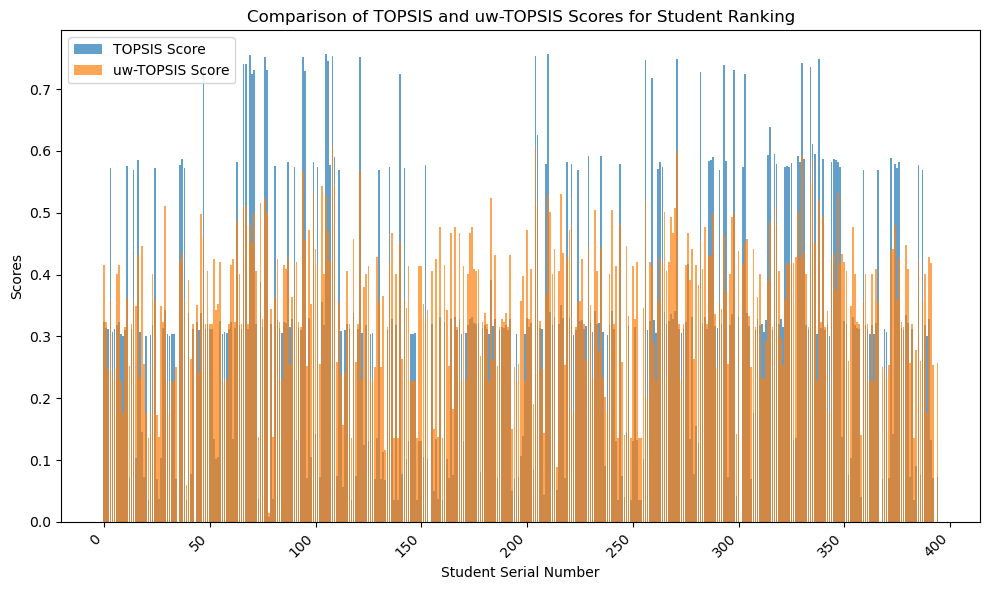

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot TOPSIS scores
plt.bar(ranked_students.index, ranked_students["TOPSIS_Score"], label="TOPSIS Score", alpha=0.7)

# Plot uw-TOPSIS scores
plt.bar(ranked_students.index, ranked_students["uwTOPSIS_Score"], label="uw-TOPSIS Score", alpha=0.7)

plt.xlabel("Student Serial Number")
plt.ylabel("Scores")
plt.title("Comparison of TOPSIS and uw-TOPSIS Scores for Student Ranking")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


<h2><span style="color:black">Training the models after using ADASYN Oversampling</span></h2>

<h3><span style="color:black">Adasyn Oversampling</span></h3>

In [69]:
from imblearn.over_sampling import ADASYN

# Step 1: Identify the minority class
# Assuming '1' represents the minority class after TOPSIS analysis
# Step 1: Identify the minority class
# Assuming scores closer to 0.0 indicate the minority class
threshold = 0.4  # Adjust the threshold as per your requirement
minority_class = ranked_students[ranked_students['TOPSIS_Score'] < threshold]

# Step 2: Separate features and target variable
X_minority = minority_class.drop(['TOPSIS_Score'], axis=1)
y_minority = minority_class['passed']

# Rest of the steps remain the same...

# Step 3: Apply ADASYN
adasyn = ADASYN()
X_oversampled, y_oversampled = adasyn.fit_resample(X_minority, y_minority)

# Step 4: Concatenate oversampled data with the original dataset
X_oversampled = pd.DataFrame(X_oversampled, columns=X_minority.columns)
y_oversampled = pd.Series(y_oversampled)
X_concatenated = pd.concat([ranked_students.drop(minority_class.index), X_oversampled])
y_concatenated = pd.concat([ranked_students.drop(minority_class.index)['passed'], y_oversampled])

# Step 5: Shuffle the concatenated dataset
X_concatenated, y_concatenated = shuffle(X_concatenated, y_concatenated, random_state=42)

# Step 6: Split the dataset into features and target variable
X_final = X_concatenated.drop(['passed', 'TOPSIS_Score', 'uwTOPSIS_Score'], axis=1)
y_final = X_concatenated['passed']

# Now you can use X_final and y_final for further analysis or model training
x_train, x_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)


<h3><span style="color:black">Decision Tree</span></h3>

In [70]:
decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(x_train, y_train)

y_pred_dt = decision_tree_model.predict(x_test)

In [71]:
y_pred_dt

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])

In [72]:
adttest = accuracy_score(y_test,y_pred_dt)
adtf1 = f1_score(y_test, y_pred_dt, average='macro')

In [73]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.67      0.58      0.62        71
         1.0       0.66      0.74      0.70        77

    accuracy                           0.66       148
   macro avg       0.66      0.66      0.66       148
weighted avg       0.66      0.66      0.66       148



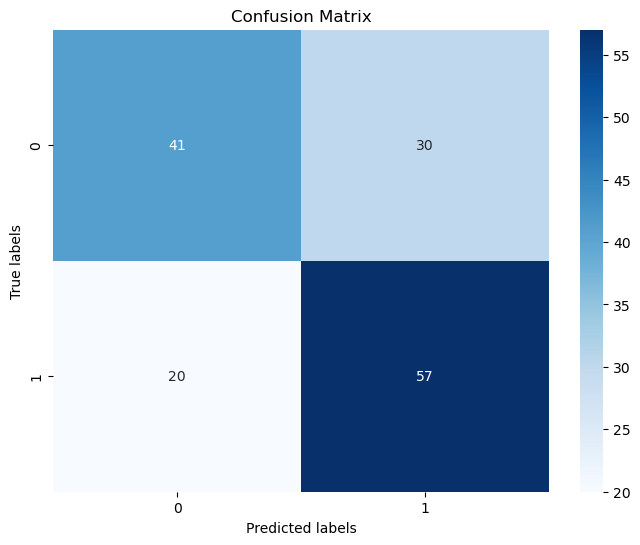

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


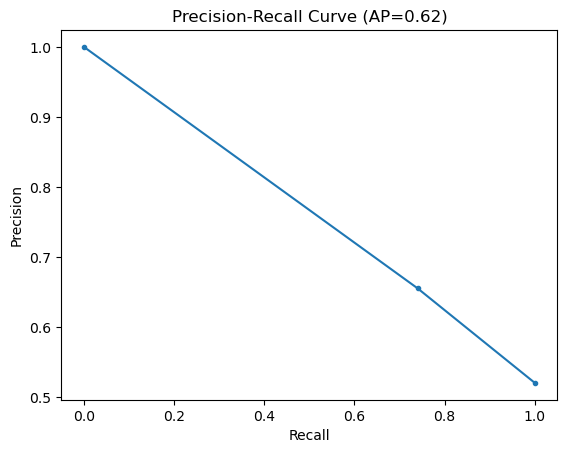

In [75]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_dt)

# Compute average precision
average_precision = average_precision_score(y_test, y_pred_dt)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


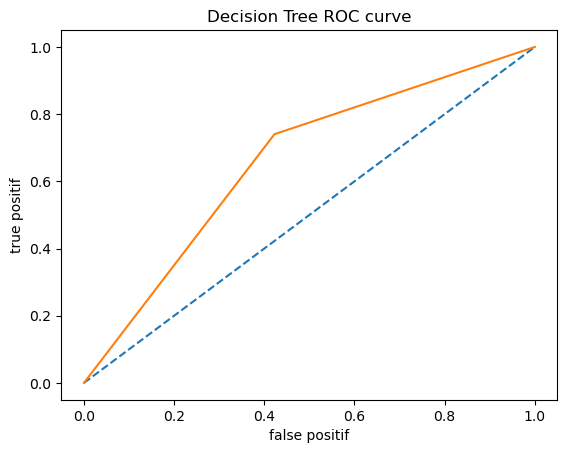

In [76]:
fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='Decisiontree')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('Decision Tree ROC curve')
p=plt.show()

<h3><span style="color:black">k-Nearest Neighbors</span></h3>

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

In [78]:
y_pred_knn

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.])

In [79]:
aknndtest = accuracy_score(y_test,y_pred_knn)
aknnf1 = f1_score(y_test, y_pred_dt, average='macro')

In [80]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.63      0.80      0.70        71
         1.0       0.75      0.56      0.64        77

    accuracy                           0.68       148
   macro avg       0.69      0.68      0.67       148
weighted avg       0.69      0.68      0.67       148



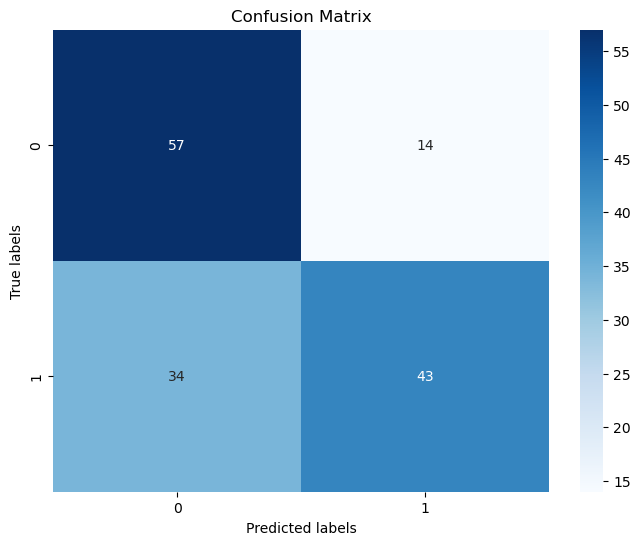

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


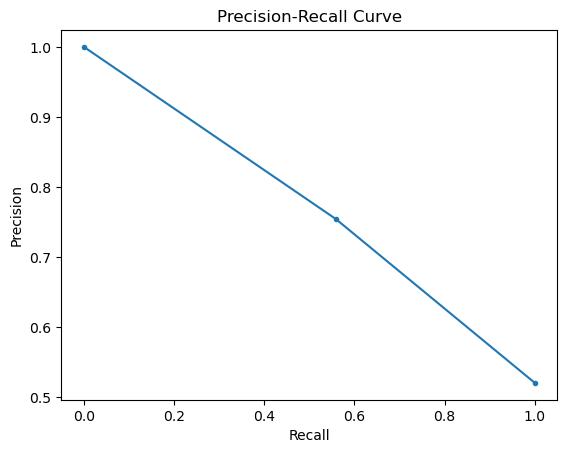

In [82]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_knn)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


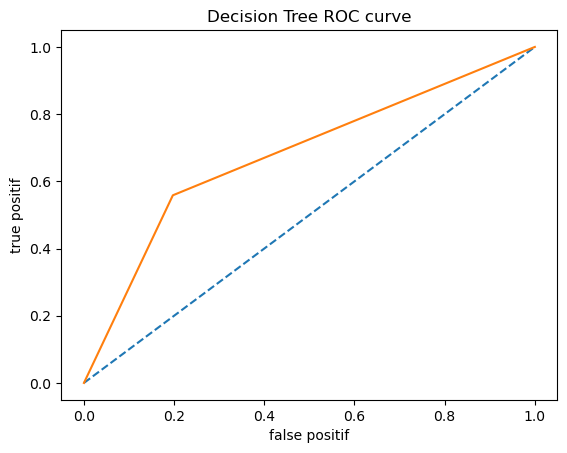

In [83]:
fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='Decisiontree')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('Decision Tree ROC curve')
p=plt.show()

<h3><span style="color:black">Naive Bayes</span></h3>

In [84]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)
aaccuracy_test_nb = accuracy_score(y_test, y_pred_nb)
af1_score_nb = f1_score(y_test, y_pred_nb, average='macro')


In [85]:
y_pred_nb

array([0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.])

In [86]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.72      0.39      0.51        71
         1.0       0.61      0.86      0.71        77

    accuracy                           0.64       148
   macro avg       0.66      0.63      0.61       148
weighted avg       0.66      0.64      0.61       148



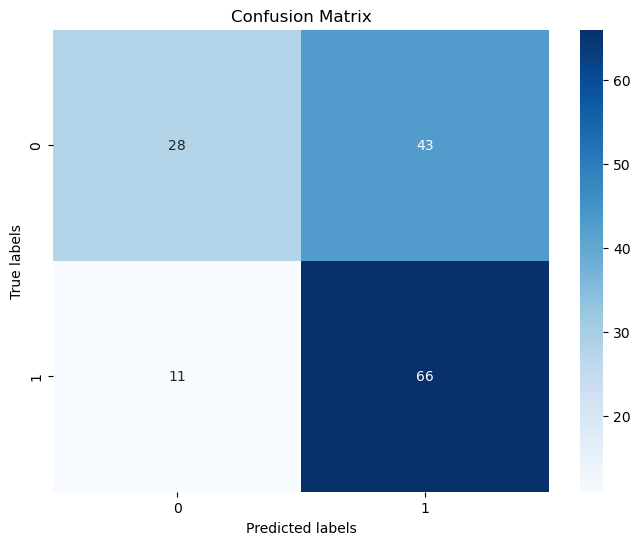

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


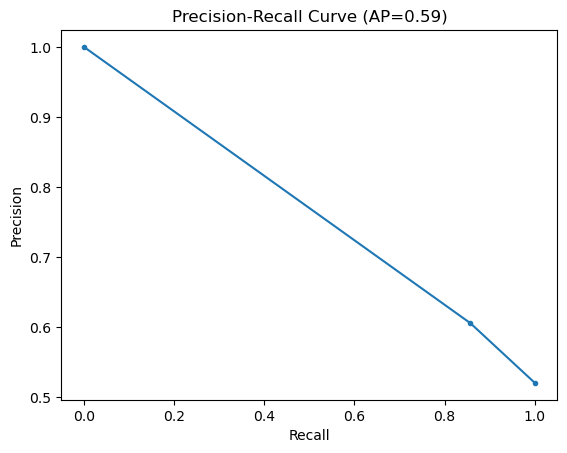

In [88]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_nb)

# Compute average precision
average_precision = average_precision_score(y_test, y_pred_nb)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


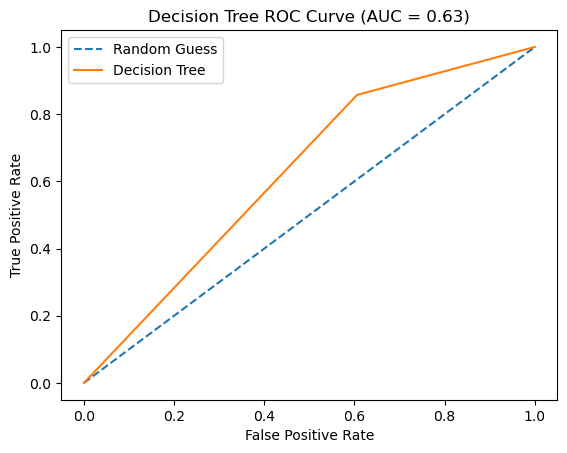

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_nb)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_nb)

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.plot(fpositif, tpositif, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.legend()
plt.show()


<h3><span style="color:black">Gradient Boosting Machine</span></h3>

In [90]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
gb_model.fit(x_train, y_train)

y_pred_gb = gb_model.predict(x_test)

In [91]:
y_pred_gb

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.])

In [92]:
gbdtest = accuracy_score(y_test,y_pred_gb)
agbf1 = f1_score(y_test, y_pred_gb, average='macro')

In [93]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.77      0.62      0.69        71
         1.0       0.70      0.83      0.76        77

    accuracy                           0.73       148
   macro avg       0.74      0.73      0.72       148
weighted avg       0.74      0.73      0.73       148



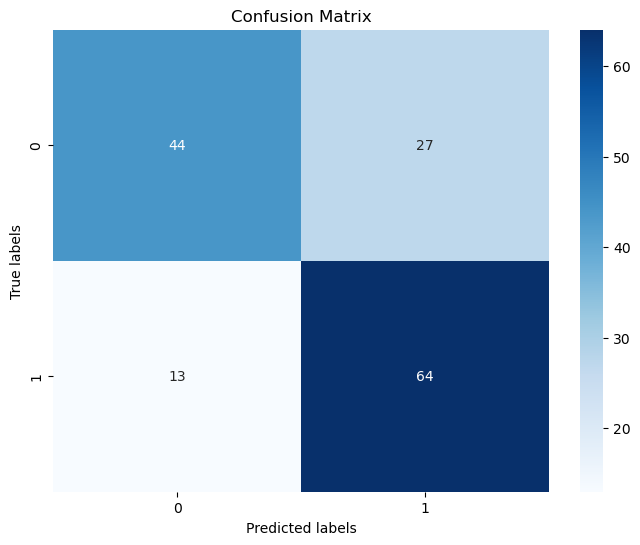

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


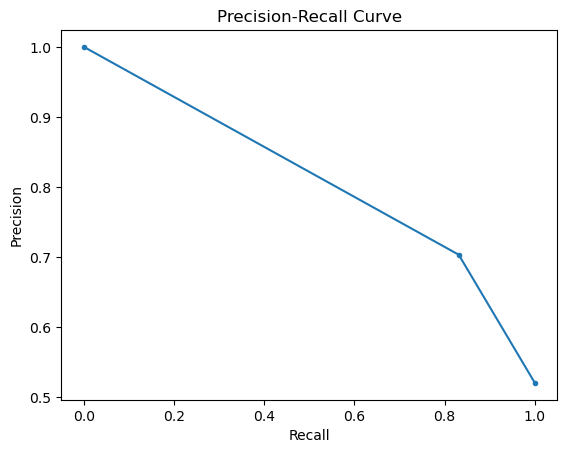

In [95]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


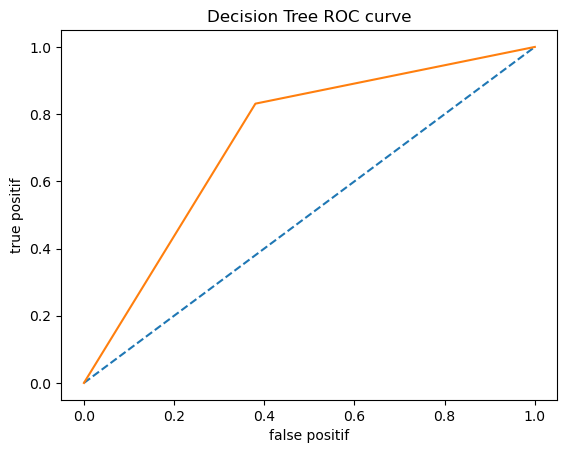

In [96]:
fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_gb)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='Decisiontree')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('Decision Tree ROC curve')
p=plt.show()

<h3><span style="color:black">eXtreme Gradient Boosting (XGBoost)</span></h3>

In [97]:
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.5)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
y_pred_xgb = xgb_model.predict(x_test)
aaccuracy_test_xgb = accuracy_score(y_test, y_pred_xgb)
af1_score_xgb = f1_score(y_test, y_pred_xgb, average='macro')

In [99]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72        71
         1.0       0.73      0.86      0.79        77

    accuracy                           0.76       148
   macro avg       0.77      0.75      0.75       148
weighted avg       0.76      0.76      0.75       148



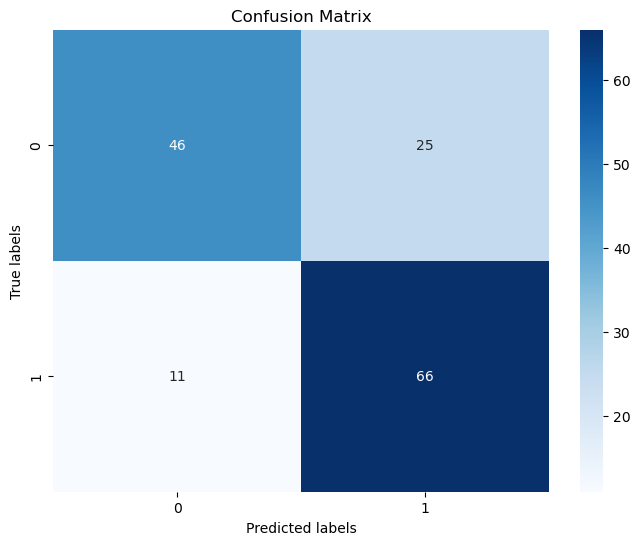

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


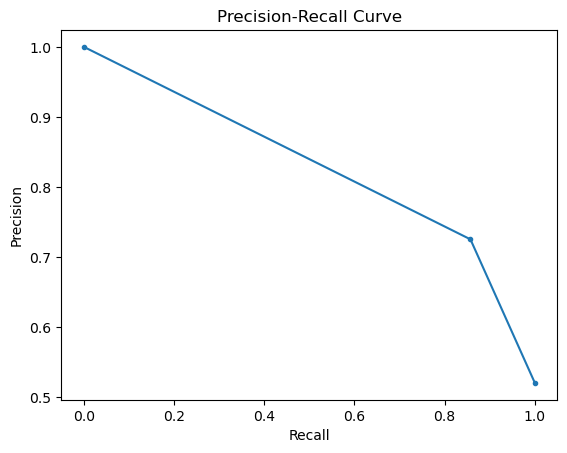

In [101]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


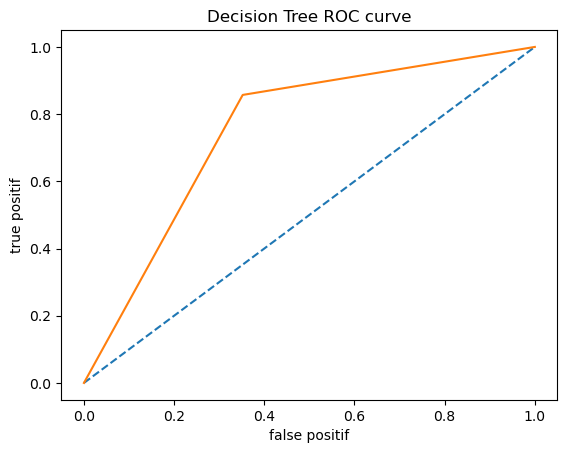

In [102]:
fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_xgb)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='Decisiontree')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('Decision Tree ROC curve')
p=plt.show()

<h2><span style="color:black">Implementation of models with ADASYN Oversampling and Hyperparameter Tuning</span></h2>

<h3><span style="color:black">eXtreme Gradient Boosting (XGBoost)</span></h3>

In [103]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Step 1: Split the oversampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

# Step 2: Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Expand the range of learning rates
    'max_depth': [3, 4, 5, 6],  # Increase the range of max_depth
    'min_child_weight': [1, 2, 3, 4],  # Adjust the range of min_child_weight
    'gamma': [0, 0.1, 0.2, 0.3],  # Adjust the range of gamma
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Add more options for colsample_bytree
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]  # Add more options for subsample
}

# Step 3: Initialize XGBoost classifier
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Step 4: Initialize GridSearchCV with XGBoost classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Step 5: Perform hyperparameter tuning on the training set
grid_search.fit(X_train, y_train)

# Step 6: Get the best hyperparameters and evaluate the model on the testing set
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Step 7: Make predictions on the test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Step 8: Evaluate the best model
accuracy_test = accuracy_score(y_test, y_pred_xgb)
f1_score_test = f1_score(y_test, y_pred_xgb, average='macro')


In [104]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71        71
         1.0       0.72      0.88      0.79        77

    accuracy                           0.76       148
   macro avg       0.77      0.75      0.75       148
weighted avg       0.77      0.76      0.75       148



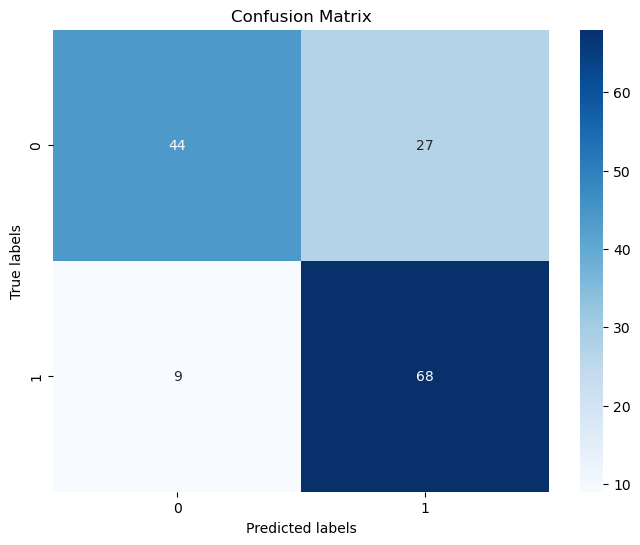

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


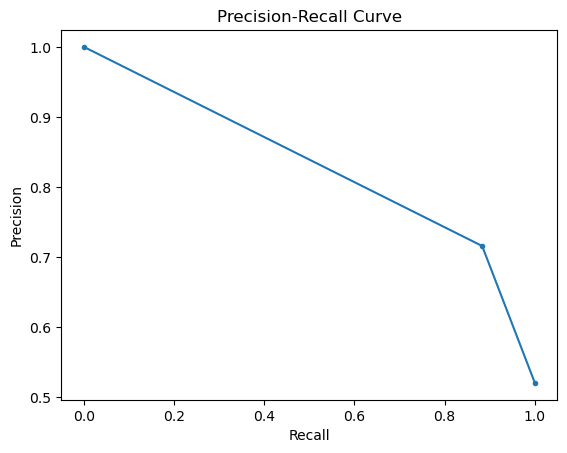

In [106]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


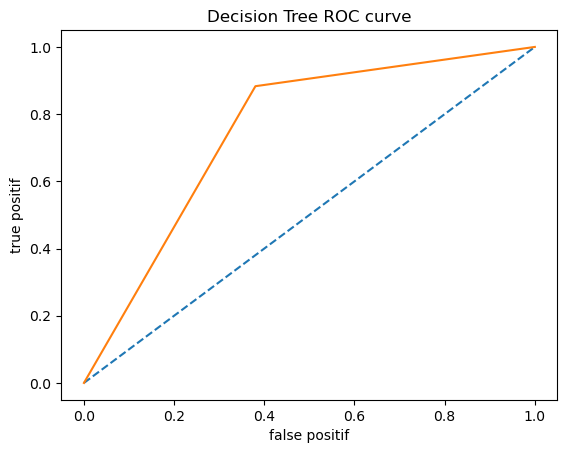

In [107]:
fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_xgb)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='Decisiontree')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('Decision Tree ROC curve')
p=plt.show()

<h3><span style="color:black">Decision Tree</span></h3>

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize a new Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)

# Train the model with the best hyperparameters on the entire training data
best_dt_classifier.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model on the testing set
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_dt = best_xgb_model.predict(X_test)

accuracy_test_dt = accuracy_score(y_test, y_pred_dt)
f1_score_test_dt = f1_score(y_test, y_pred_dt, average='macro')

In [109]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71        71
         1.0       0.72      0.88      0.79        77

    accuracy                           0.76       148
   macro avg       0.77      0.75      0.75       148
weighted avg       0.77      0.76      0.75       148



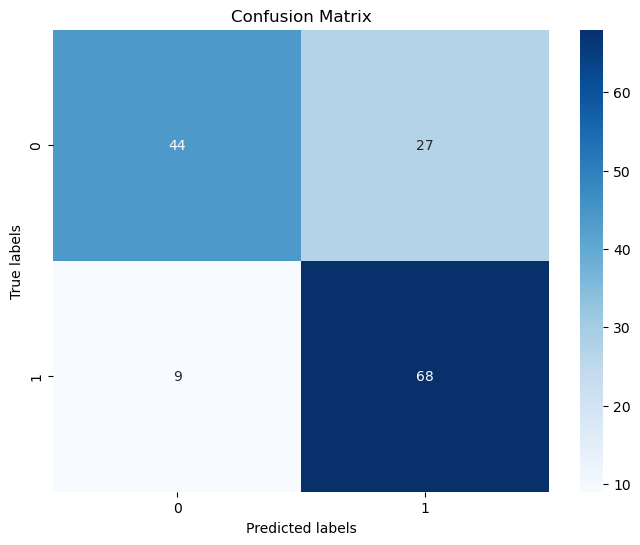

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


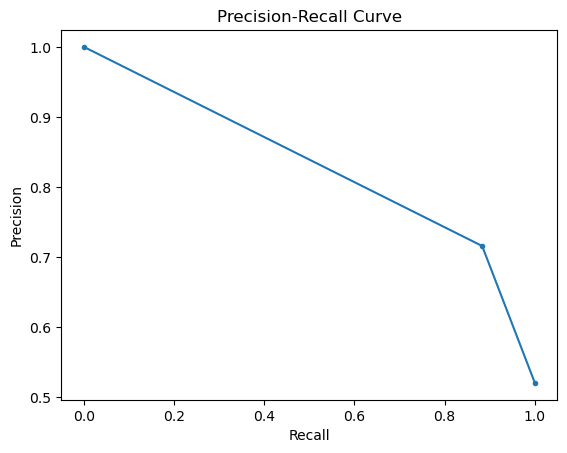

In [111]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_dt)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


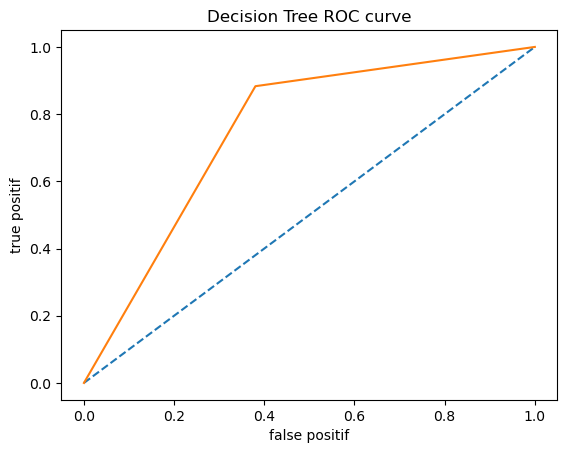

In [112]:
fpositif, tpositif, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='Decisiontree')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('Decision Tree ROC curve')
p=plt.show()

<h2><span style="color:black">Analysis of Accuracy and f1-Score</span></h2>

<h3><span style="color:black">Accuracy and F1-score of the Original models</span></h3>

In [113]:
print("\nDecision Tree : \n")

print("\tDecision Tree Accuracy Test:", dttest)
print("\tDecision Tree F1-score:", dtf1)

print("\nk-Nearest Neighbors : \n")

print('\tk-Nearest Neighbors Accuracy test:', knntest)
print('\tk-Nearest Neighbors F1 score:', knnf1)

print("\nNaive Bayes : \n")

print('\tNaive Bayes Accuracy test:', accuracy_test_nb)
print('\tNaive Bayes F1 score:', f1_score_nb)

print("\nGradient Boosting : \n")

print('\tGradient Boosting Accuracy test:', gbtest)
print('\tGradient Boosting F1 score:', gbf1)

print("\nXGBoost Accuracy : \n")

print('\tXGBoost Accuracy test:', accuracy_test_xgb)
print('\tXGBoost f1 score:', f1_score_xgb)


Decision Tree : 

	Decision Tree Accuracy Test: 0.6554621848739496
	Decision Tree F1-score: 0.6248366013071895

k-Nearest Neighbors : 

	k-Nearest Neighbors Accuracy test: 0.5714285714285714
	k-Nearest Neighbors F1 score: 0.6248366013071895

Naive Bayes : 

	Naive Bayes Accuracy test: 0.6386554621848739
	Naive Bayes F1 score: 0.5684405836214894

Gradient Boosting : 

	Gradient Boosting Accuracy test: 0.680672268907563
	Gradient Boosting F1 score: 0.632716049382716

XGBoost Accuracy : 

	XGBoost Accuracy test: 0.6722689075630253
	XGBoost f1 score: 0.6203680981595092


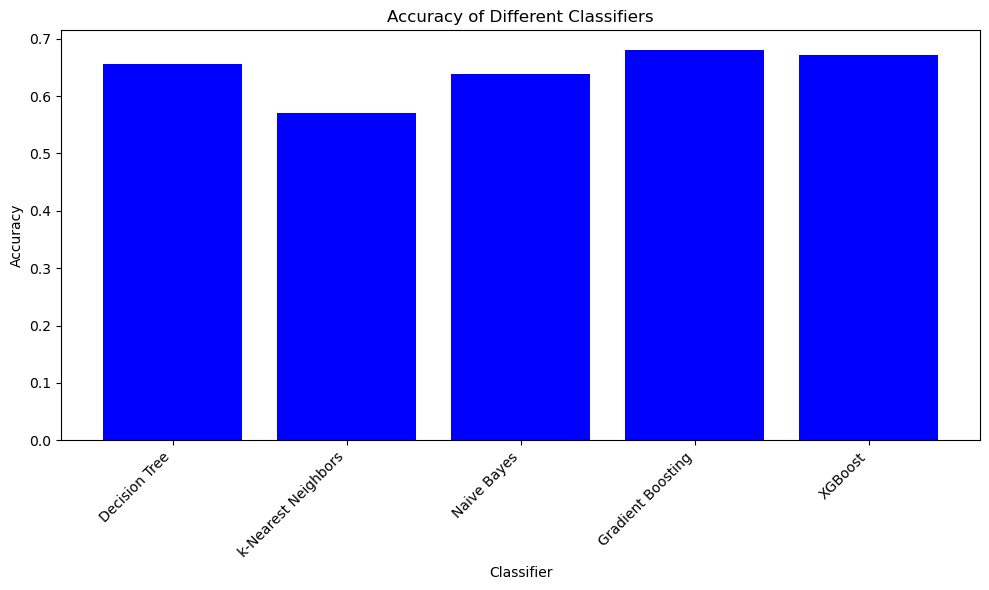

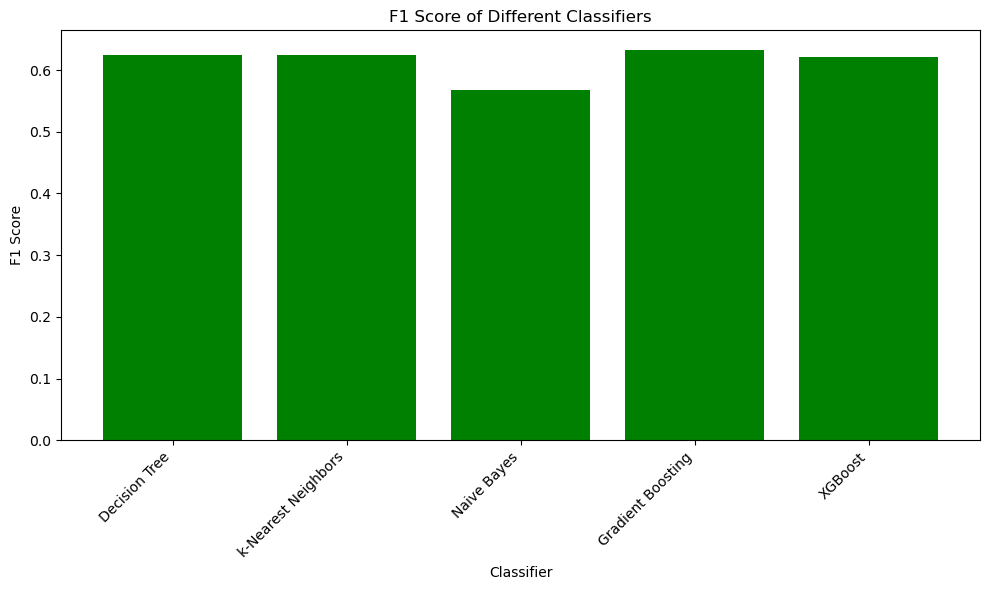

In [114]:
# Define classifier names and their corresponding accuracy and F1 scores
classifiers = ['Decision Tree', 'k-Nearest Neighbors', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']
accuracy_scores = [dttest, knntest, accuracy_test_nb, gbtest, accuracy_test_xgb]
f1_scores = [dtf1, knnf1, f1_score_nb, gbf1, f1_score_xgb]

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color='blue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting F1 score
plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_scores, color='green')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3><span style="color:black">Accuracy and F1-score of the models after using ADASYN Oversampling</span></h3>

In [115]:
print("With Adaptive Synthetic Sampling (ADASYN) : \n\n")

print("\nDecision Tree : \n")

print("\tDecision Tree Accuracy Test:", adttest)
print("\tDecision Tree F1-score:", adtf1)

print("\nk-Nearest Neighbors : \n")

print('\tk-Nearest Neighbors Accuracy test:', aknndtest)
print('\tk-Nearest Neighbors F1 score:', aknnf1)

print("\nNaive Bayes : \n")

print('\tNaive Bayes Accuracy test:', aaccuracy_test_nb)
print('\tNaive Bayes F1 score:', af1_score_nb)

print("\nGradient Boosting : \n")

print('\tGradient Boosting Accuracy test:', gbdtest)
print('\tGradient Boosting F1 score:', agbf1)

print("\nXGBoost Accuracy : \n")

print('\tXGBoost Accuracy test:', aaccuracy_test_xgb)
print('\tXGBoost f1 score:', af1_score_xgb)

With Adaptive Synthetic Sampling (ADASYN) : 



Decision Tree : 

	Decision Tree Accuracy Test: 0.6621621621621622
	Decision Tree F1-score: 0.6581670362158167

k-Nearest Neighbors : 

	k-Nearest Neighbors Accuracy test: 0.6756756756756757
	k-Nearest Neighbors F1 score: 0.6581670362158167

Naive Bayes : 

	Naive Bayes Accuracy test: 0.6351351351351351
	Naive Bayes F1 score: 0.6093841642228739

Gradient Boosting : 

	Gradient Boosting Accuracy test: 0.7297297297297297
	Gradient Boosting F1 score: 0.7247023809523809

XGBoost Accuracy : 

	XGBoost Accuracy test: 0.7567567567567568
	XGBoost f1 score: 0.7522321428571428


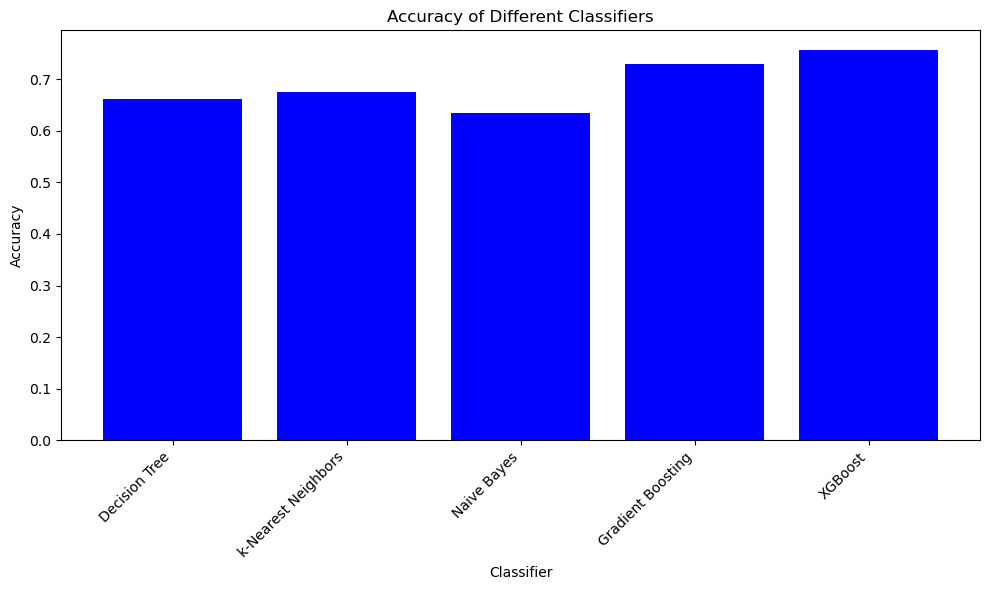

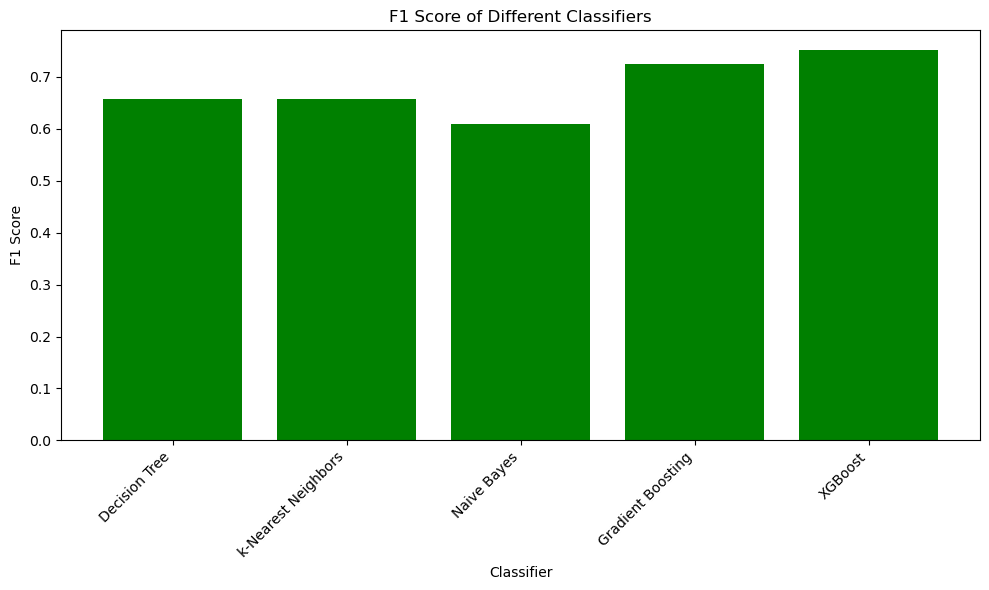

In [116]:
# Define classifier names and their corresponding accuracy and F1 scores
classifiers = ['Decision Tree', 'k-Nearest Neighbors', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']
accuracy_scores = [adttest, aknndtest, aaccuracy_test_nb, gbdtest, aaccuracy_test_xgb]
f1_scores = [adtf1, aknnf1, af1_score_nb, agbf1, af1_score_xgb]

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color='blue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting F1 score
plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_scores, color='green')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3><span style="color:black">Training the models after using ADASYN Oversampling and Hyperparameter Tuning</span></h3>

In [117]:
print("With Adaptive Synthetic Sampling (ADASYN) and Hyperparameter Tuning : \n\n")

print("Decision Tree : \n")

print('\tBest hyperparameters:', best_params)
print('\tDecision Tree Hyperparameter Tuning Accuracy:', accuracy_test_dt)
print('\tDecision Tree Hyperparameter Tuning F1 score:', f1_score_test_dt)

print("\nXGBoost : \n")

print('\tBest hyperparameters:', best_params)
print('\tXGBoost Hyperparameter Tuning Accuracy:', accuracy_test)
print('\tXGBoost Hyperparameter Tuning F1 score:', f1_score_test)

With Adaptive Synthetic Sampling (ADASYN) and Hyperparameter Tuning : 


Decision Tree : 

	Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
	Decision Tree Hyperparameter Tuning Accuracy: 0.7567567567567568
	Decision Tree Hyperparameter Tuning F1 score: 0.7501875468867216

XGBoost : 

	Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
	XGBoost Hyperparameter Tuning Accuracy: 0.7567567567567568
	XGBoost Hyperparameter Tuning F1 score: 0.7501875468867216


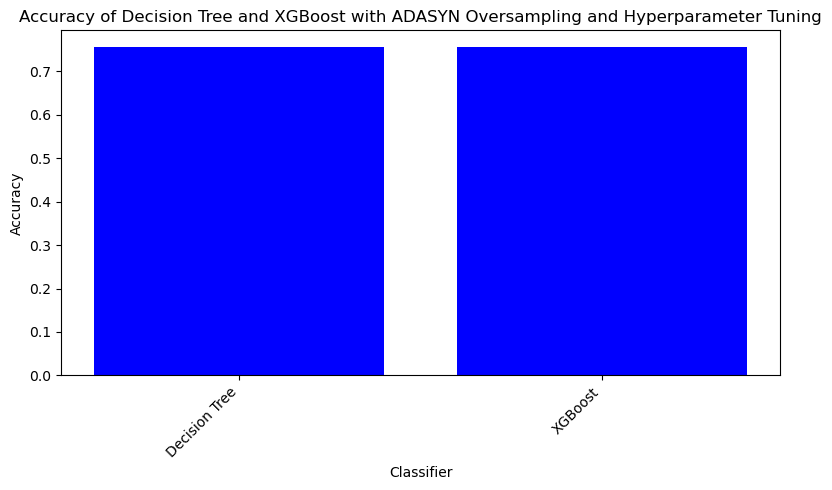

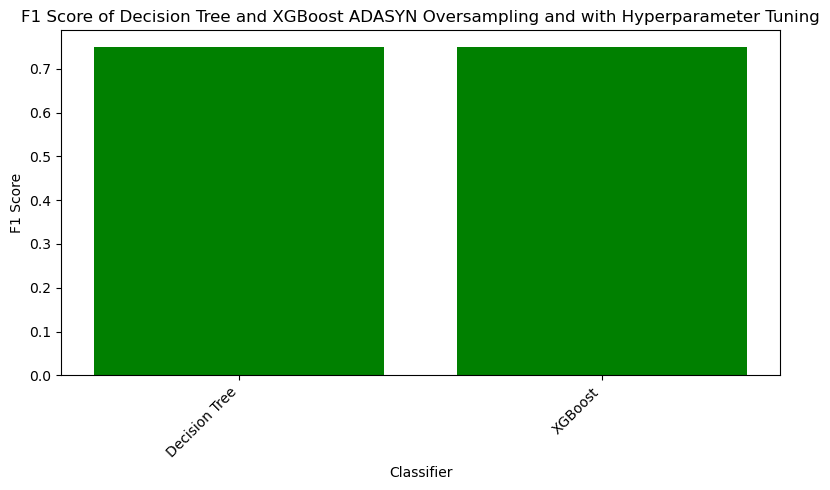

In [118]:
# Define classifier names and their corresponding accuracy and F1 scores
classifiers_hyper = ['Decision Tree', 'XGBoost']
accuracy_scores_hyper = [accuracy_test_dt, accuracy_test]
f1_scores_hyper = [f1_score_test_dt, f1_score_test]

# Plotting accuracy
plt.figure(figsize=(8, 5))
plt.bar(classifiers_hyper, accuracy_scores_hyper, color='blue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree and XGBoost with ADASYN Oversampling and Hyperparameter Tuning')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting F1 score
plt.figure(figsize=(8, 5))
plt.bar(classifiers_hyper, f1_scores_hyper, color='green')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score of Decision Tree and XGBoost ADASYN Oversampling and with Hyperparameter Tuning')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [121]:
import tkinter as tk
import numpy as np
import pandas as pd

# Function to perform numerical encoding on categorical data
def numerical_data(data):
    data['school'] = data['school'].map({'GP': 0, 'MS': 1})
    data['sex'] = data['sex'].map({'M': 0, 'F': 1})
    data['address'] = data['address'].map({'U': 0, 'R': 1})
    data['famsize'] = data['famsize'].map({'LE3': 0, 'GT3': 1})
    data['Pstatus'] = data['Pstatus'].map({'T': 0, 'A': 1})
    data['Mjob'] = data['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    data['Fjob'] = data['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    data['reason'] = data['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    data['guardian'] = data['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    data['schoolsup'] = data['schoolsup'].map({'no': 0, 'yes': 1})
    data['famsup'] = data['famsup'].map({'no': 0, 'yes': 1})
    data['paid'] = data['paid'].map({'no': 0, 'yes': 1})
    data['activities'] = data['activities'].map({'no': 0, 'yes': 1})
    data['nursery'] = data['nursery'].map({'no': 0, 'yes': 1})
    data['higher'] = data['higher'].map({'no': 0, 'yes': 1})
    data['internet'] = data['internet'].map({'no': 0, 'yes': 1})
    data['age'] = data['age'].astype(int)
    data['Medu'] = data['Medu'].astype(int)
    data['Fedu'] = data['Fedu'].astype(int)
    data['traveltime'] = data['traveltime'].astype(int)
    data['studytime'] = data['studytime'].astype(int)
    data['failures'] = data['failures'].astype(int)
    data['famrel'] = data['famrel'].astype(int)
    data['freetime'] = data['freetime'].astype(int)
    data['goout'] = data['goout'].astype(int)
    data['health'] = data['health'].astype(int)
    data['absences'] = data['absences'].astype(int)

def submit_form():
    global prediction_label

    # List to store the attribute values
    values_list = []

    # Retrieve values from entry fields or option menus
    for attribute, entry in entries.items():
        if isinstance(entry, tk.OptionMenu):
            # For OptionMenu widgets, get the selected value
            value = entry.cget('text')
        else:
            # For Entry widgets, get the entered value
            value = entry.get()

        # Ensure value is a Unicode string
        if isinstance(value, bytes):
            value = value.decode('utf-8')

        # Append the value to the list
        values_list.append(value)

    # Convert the list to a DataFrame
    data_entry = pd.DataFrame([values_list], columns=attributes)
    data_entry.to_csv('entered_data.csv', index=False)
    
    # Perform numerical encoding and feature scaling
    numerical_data(data_entry)

    # Print out the entered values after preprocessing
    print("Entered Data (After Preprocessing):\n", data_entry)
    
    # Predicting result
    y_pred = best_xgb_model.predict(data_entry)
    
    # Convert prediction result to "yes" or "no"
    prediction_result = "yes" if y_pred == 1 else "no"

    # Update the label with the predicted value
    prediction_label.config(text="Will he pass: " + prediction_result)
    
root = tk.Tk()
root.title("Student Information Form")

# Create a frame to hold the form elements
frame = tk.Frame(root)
frame.pack(fill=tk.BOTH, expand=True)

# Create a canvas
canvas = tk.Canvas(frame)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# Add a scrollbar to the canvas
scrollbar = tk.Scrollbar(frame, orient=tk.VERTICAL, command=canvas.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
canvas.configure(yscrollcommand=scrollbar.set)

# Create another frame inside the canvas to hold the form elements
inner_frame = tk.Frame(canvas)
canvas.create_window((0, 0), window=inner_frame, anchor=tk.NW)

# Function to update scroll region when the inner frame changes size
def on_frame_configure(event):
    canvas.configure(scrollregion=canvas.bbox("all"))

inner_frame.bind("<Configure>", on_frame_configure)

# Function to scroll the canvas with the mouse wheel
def scroll_canvas(event):
    if event.num == 5 or event.delta == -120:
        canvas.yview_scroll(1, "units")
    elif event.num == 4 or event.delta == 120:
        canvas.yview_scroll(-1, "units")

canvas.bind_all("<Button-4>", scroll_canvas)
canvas.bind_all("<Button-5>", scroll_canvas)
canvas.bind_all("<MouseWheel>", scroll_canvas)

# Create labels and entry fields for each attribute
attributes = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'health', 'absences']

# Abbreviations for labels
abbreviations = {
    'school': "School ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)", 'sex': "Sex('F' - female or 'M' - male)", 'age': 'Age(from 15 to 22)', 'address': "Address('U' - urban or 'R' - rural)", 'famsize': "Family size('LE3' - less or equal to 3 or 'GT3' - greater than 3)",
    'Pstatus': "Parent's cohabitation status('T' - living together or 'A' - apart)", 'Medu': "Mother's education(0 - none, 1 - primary education (4th grade), 2 -  5th to 9th grade, 3 -  secondary education or 4 -  higher education)", 'Fedu': "Father's education(0 - none, 1 - primary education (4th grade), 2 -  5th to 9th grade, 3 -  secondary education or 4 -  higher education)", 'Mjob': "Mother's job('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')", 'Fjob': "Father's job('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",
    'reason': "Reason to choose this school(close to 'home', school 'reputation', 'course' preference or 'other')", 'guardian': "Student's guardian('mother', 'father' or 'other')", 'traveltime': 'Travel time(1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)', 'studytime': 'Studytime(1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)',
    'failures': 'Number of Failures(n if 1<=n<3, else 4)', 'schoolsup': 'Extra educational support', 'famsup': 'Family educational support', 'paid': "paid classes within the course",
    'activities': "Extra-curricular activities", 'nursery': 'Attended nursery school', 'higher': 'Wants to take higher education', 'internet': 'Internet',
    'famrel': 'Family relationships(from 1 - very bad to 5 - excellent)', 'freetime': 'Free time(from 1 - very low to 5 - very high)', 'goout': 'going out with friends(from 1 - very low to 5 - very high)', 'health': 'Health(from 1 - very bad to 5 - very good)',
    'absences': 'Absencesfrom 0 to 93)'
}

options = {
    'school': ['GP', 'MS'],
    'sex': ['M', 'F'],
    'address': ['R', 'U'],
    'famsize': ['LE3', 'GT3'],
    'Pstatus': ['T', 'A'],
    'Mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'Fjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'reason': ['home', 'reputation', 'course', 'other'],
    'guardian': ['mother', 'father', 'other'],
    'schoolsup': ['yes', 'no'],
    'famsup': ['yes', 'no'],
    'paid': ['yes', 'no'],
    'activities': ['yes', 'no'],
    'nursery': ['yes', 'no'],
    'higher': ['yes', 'no'],
    'internet': ['yes', 'no']
}


entries = {}
for i, attribute in enumerate(attributes):
    label_text = abbreviations[attribute] if attribute in abbreviations else attribute.capitalize()
    label = tk.Label(inner_frame, text=label_text)
    label.grid(row=i, column=0, sticky="w", padx=10, pady=5)

    if attribute in options:
        entry = tk.OptionMenu(inner_frame, tk.StringVar(root, options[attribute][0]), *options[attribute])
    else:
        entry = tk.Entry(inner_frame)

    entry.grid(row=i, column=1, padx=10, pady=5)
    entries[attribute] = entry

# Create submit button
submit_button = tk.Button(inner_frame, text="Submit", command=submit_form)
submit_button.grid(row=len(attributes), columnspan=2, pady=10)

# Create prediction label
prediction_label = tk.Label(inner_frame, text="")
prediction_label.grid(row=len(attributes) + 1, columnspan=2)

# Update scroll region
on_frame_configure(None)

root.state("normal")
root.mainloop()

Entered Data (After Preprocessing):
    school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   16        1        0        0     4     4     0     1  ...   

   paid  activities  nursery  higher  internet  famrel  freetime  goout  \
0     1           1        1       1         1       5         5      5   

   health  absences  
0       5         5  

[1 rows x 27 columns]
Entered Data (After Preprocessing):
    school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   16        1        0        0     0     0     4     4  ...   

   paid  activities  nursery  higher  internet  famrel  freetime  goout  \
0     0           0        0       0         1       1         1      1   

   health  absences  
0       1         1  

[1 rows x 27 columns]
